## Supervised Machine Learning Algorithms ##

In [ ]:
from sklearn.model_selection import train_test_split

# X is your feature data, and y is your target (class labels or categories).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


When working with a classification problem in data science, it's important to ensure that the distribution of classes in your training and testing datasets is representative of the overall dataset. The train_test_split function from libraries like scikit-learn in Python allows you to split your data into a training set and a testing set while maintaining the same class distribution. This is where the stratify parameter comes into play.

Here's how to use train_test_split with the stratify parameter:


In this example:

- X represents your feature data, which could be a NumPy array or a Pandas DataFrame.
- y represents the corresponding target variable (class labels or categories).
- test_size is the fraction of the data to reserve for testing. Here, it's set to 20%, meaning 80% will be used for training.
- stratify=y ensures that the class distribution in the training and testing sets is similar to the original data. This helps in preventing bias in the splitting process and is crucial when working with imbalanced datasets.
- random_state is a random seed for reproducibility. It ensures that the data is split the same way each time you run the code.

By using stratify, you'll have a training and testing set that closely resembles the distribution of the original data, which is important for building and evaluating machine learning models, especially in classification tasks.

X.shape: (26, 2)


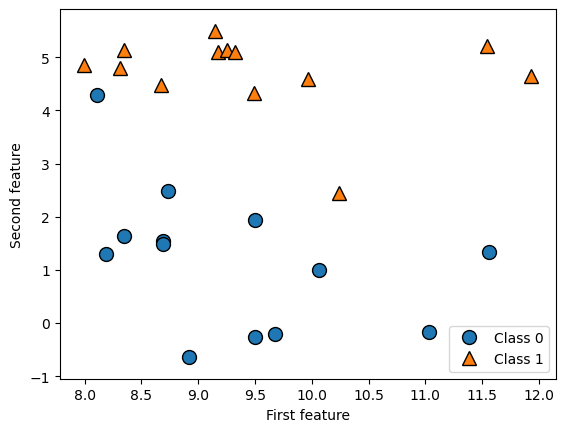

In [9]:
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:", X.shape)

Text(0, 0.5, 'Target')

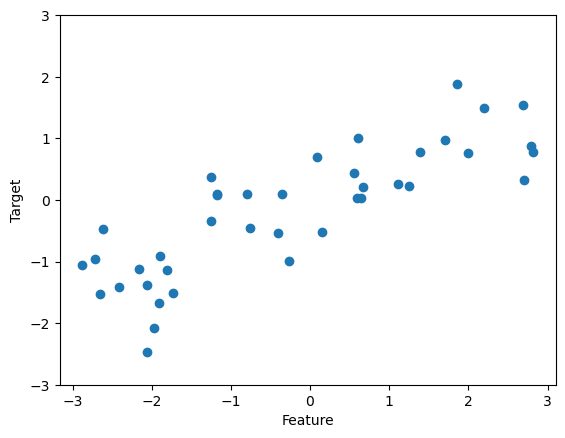

In [11]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [ ]:
#### k-Nearest Neighbors

the algorithm finds the closest data points in the training dataset—its “nearest neighbors.”

##### k-Neighbors classification
the k-NN algorithm considers exactly k nearest neighbor

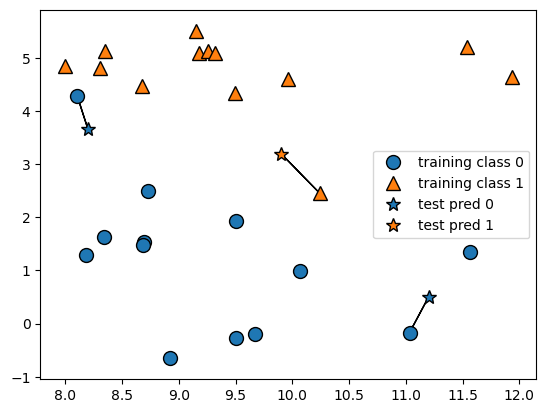

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

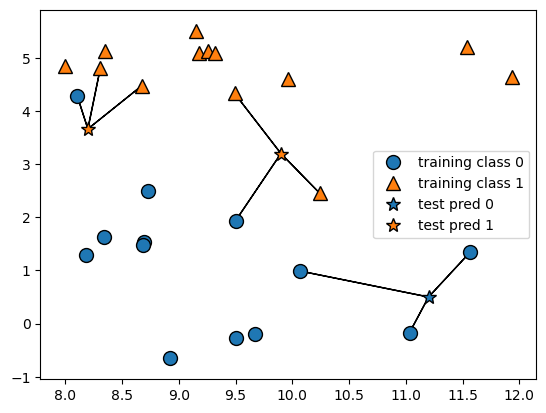

In [15]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

**1. split our data into a training and a test set so we can evaluate generalization performance**

In [17]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

**2. import and instantiate the class, set parameters, like the
number of neighbors to use. Here, we set it to 3**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier (n_neighbors=3)

**3. fit the classifier using the training set. For KNeighborsClassifier this
means storing the dataset, so we can compute neighbors during prediction**

In [22]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

**4. To make predictions on the test data, we call the predict method. For each data point
in the test set, this computes its nearest neighbors in the training set and finds the
most common class among these**

In [23]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


**5. To evaluate how well our model generalizes, we can call the score method with the
test data together with the test labels:**

In [24]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


We see that our model is **about 86% accurate, meaning the model predicted the class
correctly for 86% of the samples in the test dataset**.

### Analyzing KNeighborsClassifier ###

For two-dimensional datasets, we can also illustrate the prediction for all possible test
points in the xy-plane. We color the plane according to the class that would be
assigned to a point in this region. This lets us view **the decision boundary, which is the
divide between where the algorithm assigns class 0 versus where it assigns class 1**. 

Using a single neighbor results in a decision boundary that follows the training data closely. **Considering more and more neighbors leads to a smoother decision boundary. A smoother boundary corresponds to a
simpler model**. In other words, **using few neighbors corresponds to high model complexity and using many neighbors corresponds to low model complexity**

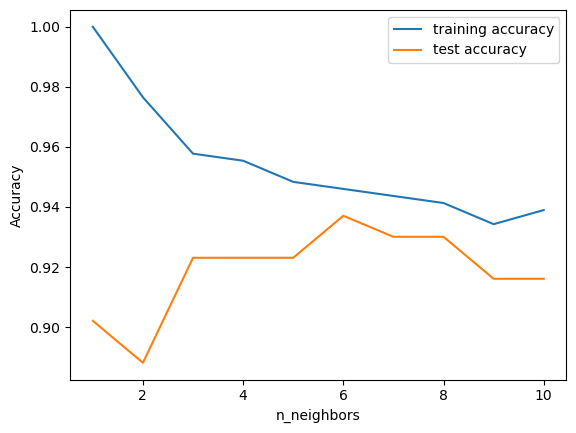

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

training_accuracy = []
test_accuracy = []
# set the neighbours number
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    #build the model
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    #record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    #record test set accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.xlabel("n_neighbors")
plt.ylabel('Accuracy')
plt.legend()

### k-neighbors regression ###

There is also **a regression variant of the k-nearest neighbors algorithm**. Again, let’s
start by using the single nearest neighbor, this time using the wave dataset. We’ve
added three test data points as green stars on the x-axis. The prediction using a single
neighbor is just the target value of the nearest neighbor. These are shown as blue stars
in Figure 2-8:

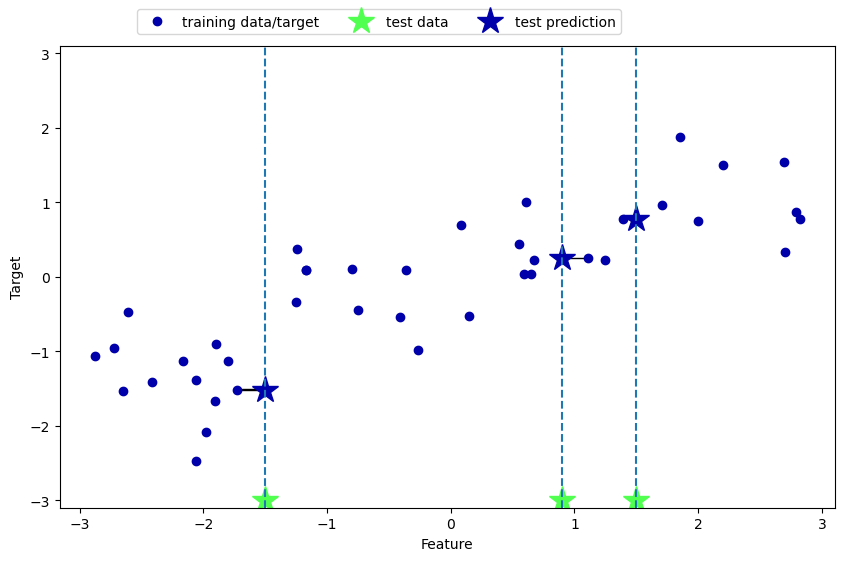

In [8]:
import mglearn
mglearn.plots.plot_knn_regression(n_neighbors=1)

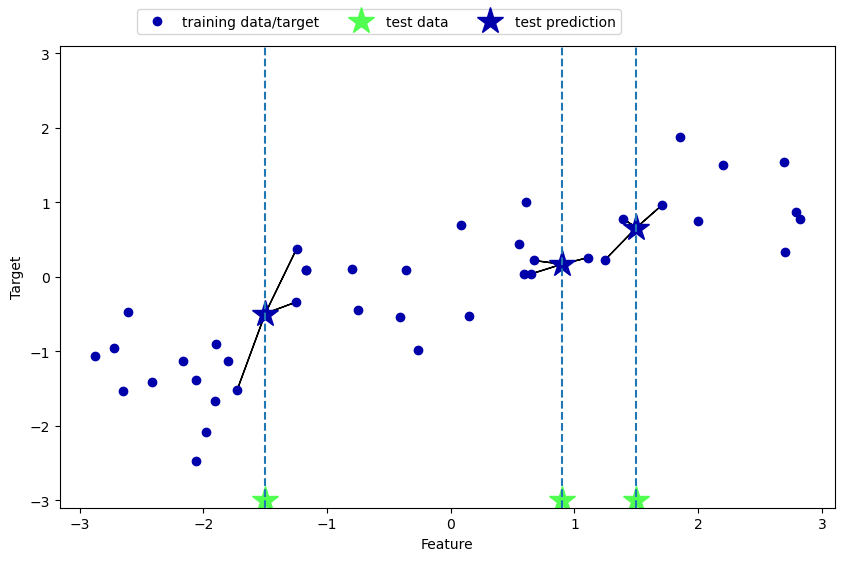

In [29]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [30]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [31]:
# make predictions on the test set
print("Test set prediction:\n{}".format(reg.predict(X_test)))

Test set prediction:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


We can also evaluate the model using **the score method, which for regressors returns
the R score**. The R score, also known as **the coefficient of determination, is a measure of goodness of a prediction for a regression model**, and yields a score between 0
and 1. **A value of 1 corresponds to a perfect prediction, and a value of 0 corresponds
to a constant model that just predicts the mean of the training set responses, y_train**:

In [33]:
print("Test R Score:\n{:.2f}".format(reg.score(X_test, y_test)))

Test R Score:
0.83


Here, the score is 0.83, which indicates a relatively good model fit.

### Analyzing KNeighborsRegressor ###

For our one-dimensional dataset, we can see what the predictions look like for all
possible feature values (Figure 2-10). To do this, we create a test dataset consisting of
many points on the x-axis, which corresponds to the single feature:

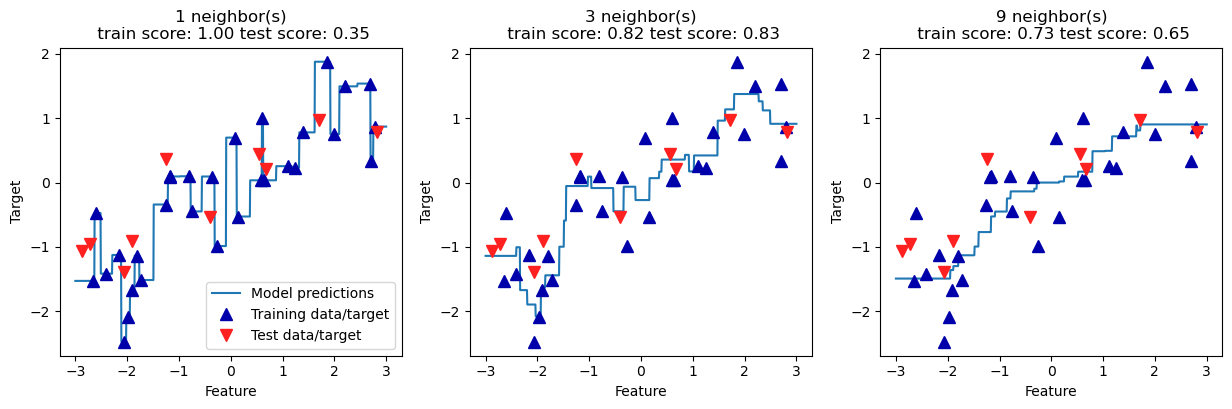

In [57]:
import numpy as np
fig, axes = plt.subplots(1, 3, figsize=(15,4))

# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3,3,1000).reshape(-1,1)

for n_neighbors, ax in zip([1,3,9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),reg.score(X_test, y_test)))
        
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")
    


As we can see from the plot, **using only a single neighbor, each point in the training
set has an obvious influence on the predictions, and the predicted values go through
all of the data points**. ***This leads to a very unsteady prediction. Considering more
neighbors leads to smoother predictions, but these do not fit the training data*** as well.

### Strengths, weaknesses, and parameters ###

- In principle, there are two important parameters to the KNeighbors classifier: the
number of neighbors and how you measure distance between data points. 
- In practice,using a small number of neighbors like three or five often works well, but you should
certainly adjust this parameter. 
- Choosing the right distance measure is somewhat beyond the scope of this book. **By default, Euclidean distance is used, which works
well in many settings.**
- One of the strengths of k-NN is that the model is very easy to understand, and often
gives reasonable performance without a lot of adjustments. 
- Building the nearest neighbors model is usually very fast, but when your training set is very
large (either in number of features or in number of samples) prediction can be slow.
- When using the k-NN algorithm, it’s important to preprocess your data (see Chap‐
ter 3). This approach often does not perform well on datasets with many features
(hundreds or more), and it does **particularly badly with datasets where most features
are 0 most of the time (so-called sparse datasets)**.
-the nearest k-neighbors algorithm is easy to understand, it is not often used
in practice, due to prediction being slow and its inability to handle many features.
The method we discuss next has neither of these drawbacks.

### Linear Models ###

Linear models make a prediction using a linear function of the input features.

Linear regression is a fundamental statistical and machine learning technique used to model the relationship between a dependent variable (also called the target or response variable) and one or more independent variables (predictors or features). It assumes that the relationship between the variables is linear, meaning that changes in the independent variables are associated with a constant change in the dependent variable.

In simple linear regression, there is one independent variable, and the model is represented as:

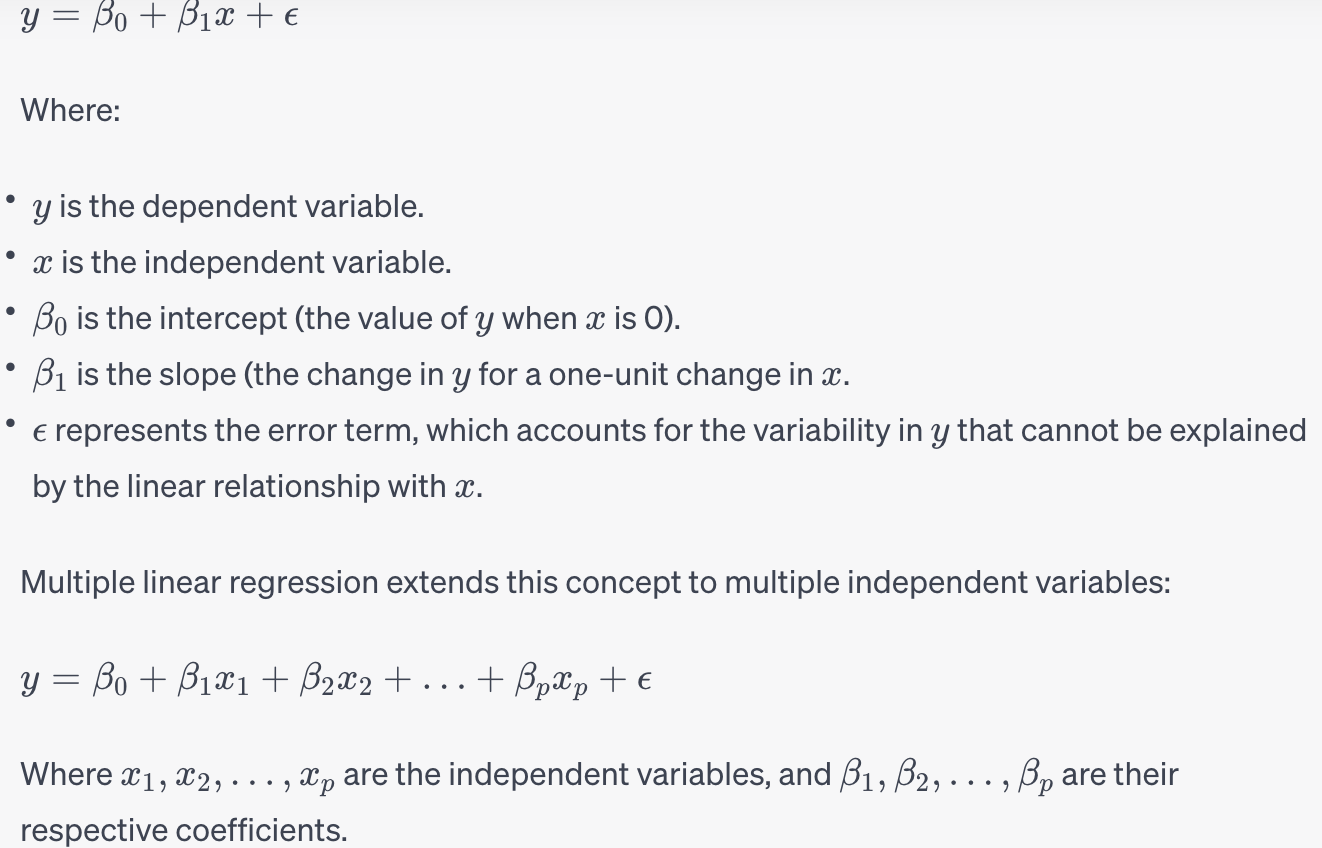

The goal of linear regression is to estimate the coefficients (β1,…,βp) that best describe the linear relationship between the independent and dependent variables. This is typically done by finding the coefficients that minimize the sum of the squared differences between the predicted values and the actual values (i.e., the least squares method).

Linear regression is widely used in data science for tasks such as predicting house prices, stock prices, and any other problem where you want to understand and model the relationship between variables. It's a simple yet powerful tool, and its results can be interpreted easily.

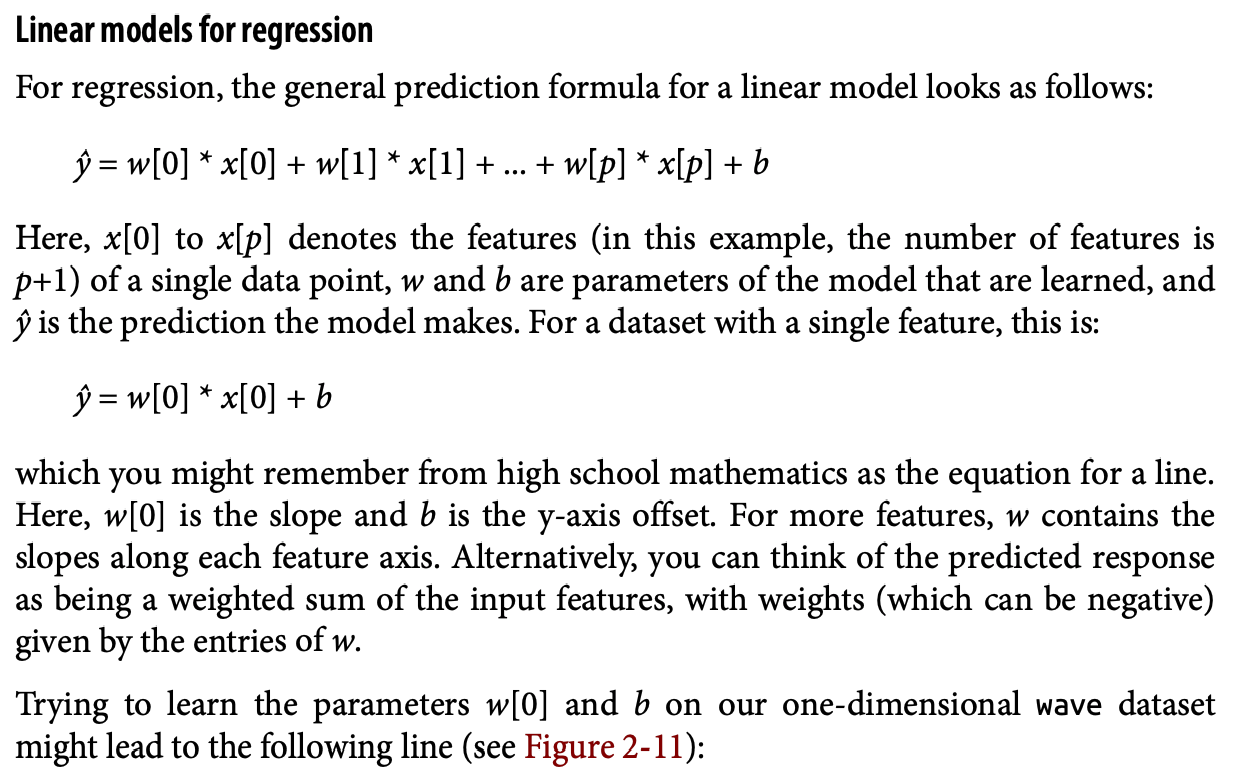

w[0]: 0.393906  b: -0.031804


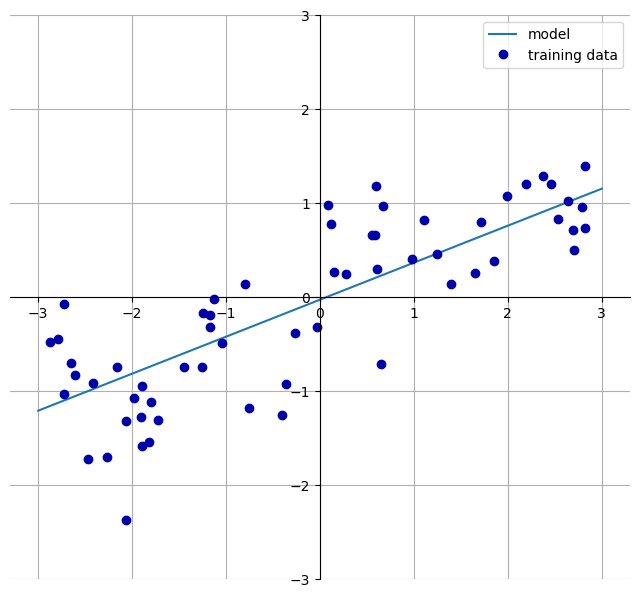

In [58]:
mglearn.plots.plot_linear_regression_wave()

Linear models for regression can be characterized as **regression models for which the
prediction is a line for a single feature, a plane when using two features, or a hyper‐
plane in higher dimensions (that is, when using more features)**

### Linear regression (aka ordinary least squares) ###

**Linear regression, or ordinary least squares (OLS)**, is the simplest and most classic linear method for regression. Linear regression finds **the parameters w and b that mini‐
mize the mean squared error between predictions and the true regression targets, y,
on the training set**. ***The mean squared error is the sum of the squared differences
between the predictions and the true values, divided by the number of samples***. Lin‐
ear regression has no parameters, which is a benefit, but it also has no way to control
model complexity.

In [59]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

***The “slope” parameters (w), also called weights or coefficients, are stored in the coef_
attribute, while the offset or intercept (b) is stored in the intercept_ attribute:***

In [60]:
print("lr.coef_:", lr.coef_) # w=weights=coefficient=slope=th change in y for 1-unit change in x
print("lr.intercept_:", lr.intercept_) #intercept=offset=the value of y when x is 0

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


You might notice **the strange-looking trailing underscore at the end
of coef_ and intercept_. scikit-learn always stores anything
that is derived from the training data in attributes that end with a
trailing underscore. That is to separate them from parameters that
are set by the user.**

The **intercept_ attribute is always a single float number**, while **the coef_ attribute is
a NumPy array with one entry per input feature**. As we only have a single input fea‐
ture in the wave dataset, lr.coef_ only has a single entry.

In [62]:
# the training set and test set performance:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


An R2 of around 0.66 is not very good, but we can see that ***the scores on the training
and test sets are very close together. This means we are likely underfitting***, not over‐
fitting. For this one-dimensional dataset, there is little danger of overfitting, as the
model is very simple (or restricted). However, ***with higher-dimensional datasets
(meaning datasets with a large number of features), linear models become more pow‐
erful, and there is a higher chance of overfitting.***


Let’s take a look at how LinearRegression performs on a more complex dataset, like the Boston Housing dataset.
Remember that this dataset has 506 samples and 105 derived features. First, we load
the dataset and split it into a training and a test set. Then we build the linear regres‐
sion model as before:

In [65]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [66]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


This ***discrepancy between performance on the training set and the test set is a clear
sign of overfitting***, and therefore we should try to find ***a model that allows us to con‐
trol complexity***. One of the most commonly used alternatives to standard linear
regression is ***ridge regression***, which we will look into next.

### Ridge regression ###

In ridge regression,though, ***the coefficients (w) are chosen not only so that they predict well on the train‐
ing data, but also to fit an additional constraint*** We also want ***the magnitude of coefficients to be as small as possible; in other words, all entries of w should be close to
zero*** Intuitively, this means ***each feature should have as little effect on the outcome as
possible (which translates to having a small slope)***, while still predicting well. This
constraint is an example of what is called ***regularization. Regularization means explicitly restricting a model to avoid overfitting***. The particular kind used by ridge regression is known as ***L2 regularization*** 

Ridge regression is implemented in linear_model.Ridge. Let’s see how well it does
on the extended Boston Housing dataset:

In [67]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


As you can see, **the training set score of Ridge is lower than for LinearRegression,
while the test set score is higher**. This is consistent with our expectation. With linear
regression, we were overfitting our data Ridge is a more restricted model, so we are
less likely to overfit**. **A less complex model means worse performance on the training
set, but better generalization**. As we are only interested in generalization performance, we should choose the Ridge model over the LinearRegression model.

**The Ridge model makes a trade-off between the simplicity of the model (near-zero
coefficients) and its performance on the training set**. ***How much importance the
model places on simplicity versus training set performance can be specified by the
user, using the alpha parameter***. In the previous example, we used the default param‐
eter alpha=1.0. There is no reason why this will give us the best trade-off, though.
The optimum setting of alpha depends on the particular dataset we are using.
***Increasing alpha forces coefficients to move more toward zero, which decreases
training set performance but might help generalization***. For example:

In [68]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


**Decreasing alpha allows the coefficients to be less restricted, meaning we move right**
in Figure 2-1. For ***very small values of alpha, coefficients are barely restricted at all,
and we end up with a model that resembles LinearRegression***:

In [69]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


**A higher alpha means a more restricted model, so we expect the entries of coef_ to
have smaller magnitude for a high value of alpha than for a low value of alpha.**

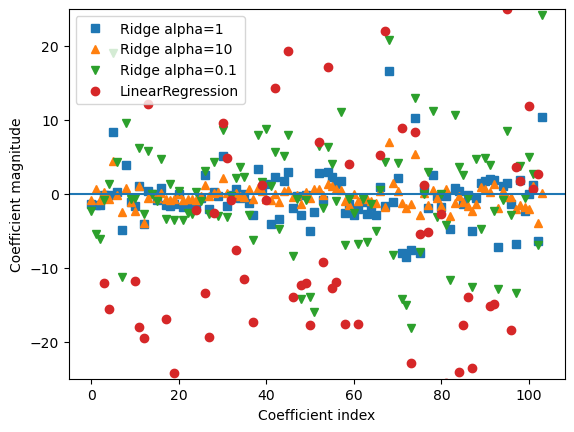

In [70]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

Figure 2-12. Comparing coefficient magnitudes for ridge regression with different values
of alpha and linear regression

Here, the x-axis enumerates the entries of coef_: x=0 shows the coefficient associated
with the first feature, x=1 the coefficient associated with the second feature, and so on
up to x=100. The y-axis shows the numeric values of the corresponding values of the
coefficients. The main takeaway here is that for alpha=10, the coefficients are mostly
between around –3 and 3. The coefficients for the Ridge model with alpha=1 are
somewhat larger. The dots corresponding to alpha=0.1 have larger magnitude still,
and many of the dots corresponding to linear regression without any regularization
(which would be alpha=0) are so large they are outside of the chart.

Another way to understand the influence of regularization is to fix a value of alpha
but vary the amount of training data available. For Figure 2-13, ***we subsampled the
Boston Housing dataset and evaluated LinearRegression and Ridge(alpha=1) on
subsets of increasing size (plots that show model performance as a function of dataset
size are called learning curves)***:

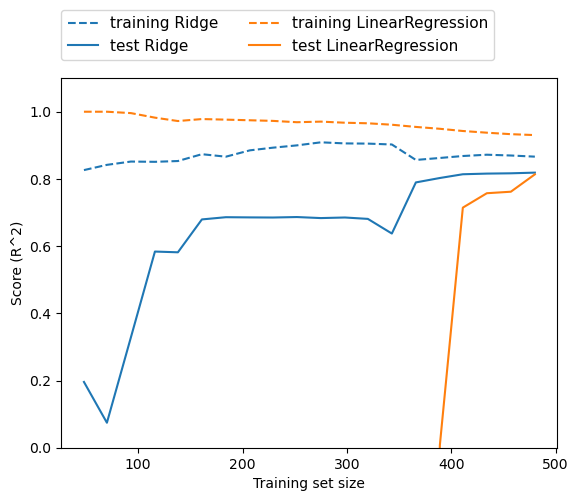

In [71]:
mglearn.plots.plot_ridge_n_samples()

Figure 2-13. Learning curves for ridge regression and linear regression on the Boston
Housing dataset

As one would expect, 
- the training score is higher than the test score for all dataset sizes, for both ridge and linear regression. - Because ridge is regularized, the training score of ridge is lower than the training score for linear regression across the board.
- However, the test score for ridge is better, particularly for small subsets of the data.
- For less than 400 data points, linear regression is not able to learn anything. 
- As more and more data becomes available to the model, both models improve, and linear regression catches up with ridge in the end. '
- The lesson here is that with enough training data, regularization becomes less important, and given enough data, ridge and linear regression will have the same performance (the fact that this happens here when using the full dataset is just by chance). 
- Another interesting aspect of Figure 2-13 is the decrease in training performance for linear regression. If more data is added, it becomes harder for a model to overfit, or memorize the data.

### Lasso ###
An alternative to Ridge for regularizing linear regression is Lasso. **As with ridge
regression, using the lasso also restricts coefficients to be close to zero, but in a
slightly different way, called L1 regularization**

**The consequence of L1 regularization is that when using the lasso, some coefficients are exactly zero. This means some fea‐
tures are entirely ignored by the model. This can be seen as a form of automatic feature selection**. Having some coefficients be exactly zero often makes a model easier to
interpret, and can reveal the most important features of your model.

In [72]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


As you can see, Lasso does quite badly, both on the training and the test set. This
indicates that we are **underfitting, and we find that it used only 4 of the 105 features.**
Similarly to Ridge, the **Lasso also has a regularization parameter, alpha, that controls
how strongly coefficients are pushed toward zero**. In the previous example, we used
the default of alpha=1.0. To reduce underfitting, **let’s try decreasing alpha. When we
do this, we also need to increase the default setting of max_iter (the maximum num‐
ber of iterations to run)**:

In [73]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


A lower alpha allowed us to fit a more complex model, which worked better on the
training and test data. ***The performance is slightly better than using Ridge, and we are
using only 33 of the 105 features. This makes this model potentially easier to under‐
stand.***

If we set alpha too low, however, we again remove the effect of regularization and end
up overfitting, with a result similar to LinearRegression:

In [74]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


we can plot the coefficients of the different models

Text(0, 0.5, 'Coefficient magnitude')

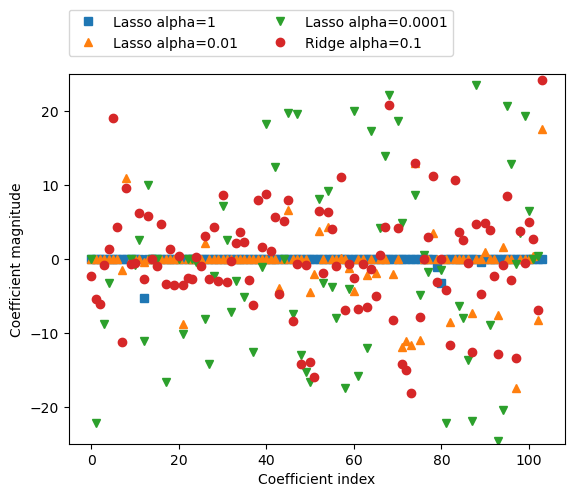

In [75]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

Figure 2-14. Comparing coefficient magnitudes for lasso regression with different values
of alpha and ridge regression

For alpha=1, we not only see that most of the coefficients are zero (which we already
knew), but that the remaining coefficients are also small in magnitude. Decreasing
alpha to 0.01, we obtain the solution shown as an upward pointing triangle, which
causes most features to be exactly zero. Using alpha=0.0001, we get a model that is
quite unregularized, with most coefficients nonzero and of large magnitude. For
comparison, the best Ridge solution is shown as circles. The Ridge model with
alpha=0.1 has similar predictive performance as the lasso model with alpha=0.01,
but using Ridge, all coefficients are nonzero.

**In practice, ridge regression is usually the first choice between these two models.
However, if you have a large amount of features and expect only a few of them to be
important, Lasso might be a better choice. Similarly, if you would like to have a
model that is easy to interpret, Lasso will provide a model that is easier to under‐
stand, as it will select only a subset of the input features. scikit-learn also provides
the ElasticNet class, which combines the penalties of Lasso and Ridge**. 

In practice,this combination works best, though at the price of having two parameters to adjust:
one for the L1 regularization, and one for the L2 regularization.

### Linear models for classification ###

Linear models are also extensively used for classification. Let’s look at binary classification first. In this case, a prediction is made using the following formula:

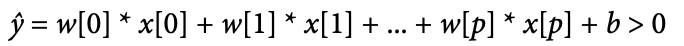

The formula looks **very similar to the one for linear regression, but instead of just
returning the weighted sum of the features, we threshold the predicted value at zero**.

**If the function is smaller than zero, we predict the class –1; if it is larger than zero, we
predict the class +1.** This prediction rule is common to all linear models for classification. Again, there are many different ways to find the coefficients (w) and the intercept (b).

For linear models for regression, **the output, ŷ, is a linear function of the features: a
line, plane, or hyperplane (in higher dimensions)**. For **linear models for classification,
the decision boundary is a linear function of the input**. In other words, a (binary) linear classifier is a classifier that separates two classes using a line, a plane, or a hyper‐
plane. We will see examples of that in this section.

There are many algorithms for learning linear models. These algorithms all differ in
the following two ways:
    
- The way in which they measure how well a particular combination of coefficients and intercept fits the training data
- If and what kind of regularization they use

Different algorithms choose different ways to measure what “fitting the training set
well” means. **For technical mathematical reasons, it is not possible to adjust w and b
to minimize the number of misclassifications the algorithms produce**, as one might
hope. For our purposes, and many applications, **the different choices for item 1 in the
preceding list (called loss functions) are of little significance**.
The two most common linear classification algorithms are **logistic regression, imple‐
mented in linear_model.LogisticRegression, and linear support vector machines
(linear SVMs), implemented in svm.LinearSVC (SVC stands for support vector classifier). Despite its name, LogisticRegression is a classification algorithm and not a
regression algorithm, and it should not be confused with LinearRegression.**

/Users/uli/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/uli/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


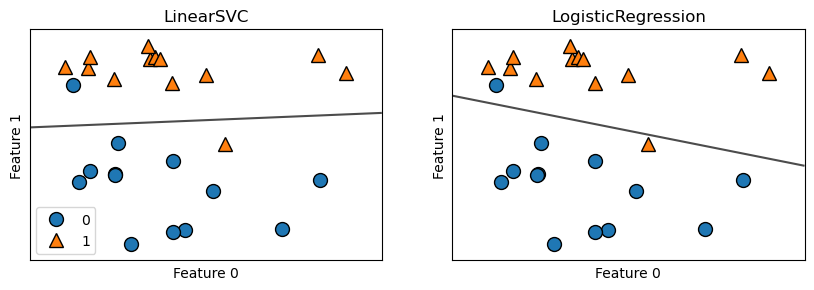

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

In this figure, we have the first feature of the forge dataset on the x-axis and the second feature on the y-axis, as before. We display the decision boundaries found by
LinearSVC and LogisticRegression respectively as straight lines, separating the area
classified as class 1 on the top from the area classified as class 0 on the bottom. In
other words, any new data point that lies above the black line will be classified as class
1 by the respective classifier, while any point that lies below the black line will be classified as class 0.

The two models come up with similar decision boundaries. Note that both misclassify two of the points. By default, **both models apply an L2 regularization, in the sameway that Ridge does for regression.**

- For LogisticRegression and LinearSVC the trade-off parameter that determines the
**strength of the regularization is called C**, and **higher values of C correspond to less regularization**. In other words, when you **use a high value for the parameter C, LogisticRegression and LinearSVC try to fit the training set as best as possible, while with low values of the parameter C, the models put more emphasis on finding a coefficient vector (w) that is close to zero**.

- There is another interesting aspect of how the parameter C acts. Using **low values of C
will cause the algorithms to try to adjust to the “majority” of data points, while using
a higher value of C stresses the importance that each individual data point be classified correctly**. 

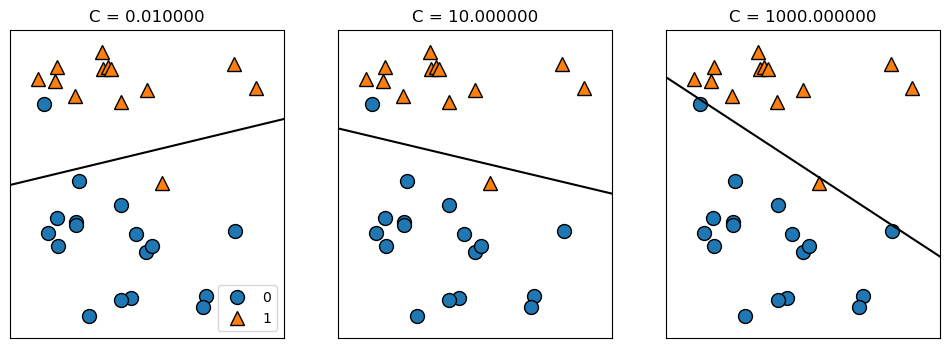

In [79]:
mglearn.plots.plot_linear_svc_regularization()

Figure 2-16. Decision boundaries of a linear SVM on the forge dataset for different
values of C

On the lefthand side, we have a very small C corresponding to a lot of regularization.
Most of the points in class 0 are at the bottom, and most of the points in class 1 are at
the top. The strongly regularized model chooses a relatively horizontal line, misclassi‐
fying two points. In the center plot, C is slightly higher, and the model focuses more
on the two misclassified samples, tilting the decision boundary. Finally, on the right‐
hand side, the very high value of C in the model tilts the decision boundary a lot, now
correctly classifying all points in class 0. One of the points in class 1 is still misclassi‐
fied, as it is not possible to correctly classify all points in this dataset using a straight
line. The model illustrated on the righthand side tries hard to correctly classify all
points, but might not capture the overall layout of the classes well. In other words,
this model is likely overfitting.
Similarly to the case of regression, linear models for classification might seem very
restrictive in low-dimensional spaces, only allowing for decision boundaries that are
straight lines or planes. Again, in high dimensions, linear models for classification
become very powerful, and guarding against overfitting becomes increasingly impor‐
tant when considering more features.

In [80]:
# Let’s analyze LogisticRegression in more detail on the Breast Cancer dataset:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.951


/Users/uli/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The **default value of C=1** provides quite good performance, with 95% accuracy on
both the training and the test set. **But as training and test set performance are very
close, it is likely that we are underfitting**. Let’s try to increase C to fit a more flexible
model:

In [81]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.944
Test set score: 0.965


/Users/uli/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Using C=100 results in higher training set accuracy, and also a slightly increased test
set accuracy, confirming our intuition that **a more complex model should perform
better**.
We can also investigate what happens **if we use an even more regularized model than
the default of C=1, by setting C=0.01**:

In [83]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.937
Test set score: 0.930


/Users/uli/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


As expected, when moving more to the left along the scale shown in Figure 2-1 from
an already underfit model, both training and test set accuracy decrease relative to the
default parameters. Finally, let’s look at the coefficients learned by the models with the three different set‐
tings of the regularization parameter C (Figure 2-17):

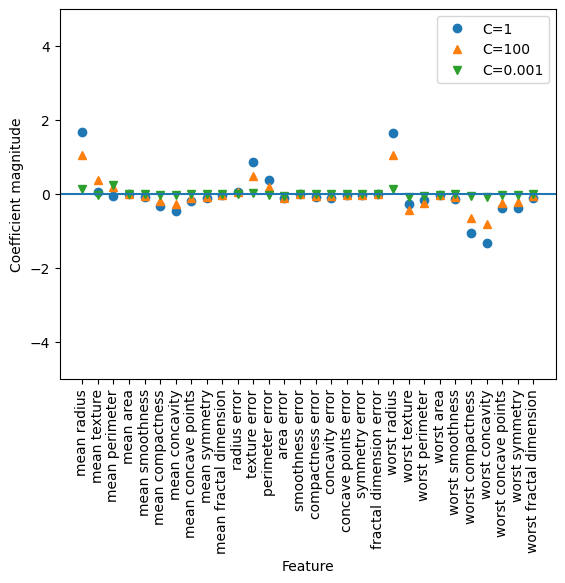

In [84]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

As LogisticRegression applies an L2 regularization by default,
the result looks similar to that produced by Ridge in Figure 2-12.
**Stronger regularization pushes coefficients more and more toward
zero, though coefficients never become exactly zero**. Inspecting the
plot more closely, we can also see an interesting effect in the third
coefficient, for “mean perimeter.” For C=100 and C=1, the coefficient
is negative, while for C=0.001, the coefficient is positive, with a
magnitude that is even larger than for C=1. Interpreting a model
like this, one might think the coefficient tells us which class a feature is associated with. For example, one might think that a high
“texture error” feature is related to a sample being “malignant.”
However, the change of sign in the coefficient for “mean perimeter”
means that depending on which model we look at, a high “mean
perimeter” could be taken as being either indicative of “benign” or
indicative of “malignant.” This illustrates that interpretations of
coefficients of linear models should always be taken with a grain of
salt.

If we desire **a more interpretable model, using L1 regularization might help, as it limits the model to using only a few features**. Here is the coefficient plot and classification accuracies for L1 regularization (Figure 2-18):

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


/Users/uli/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


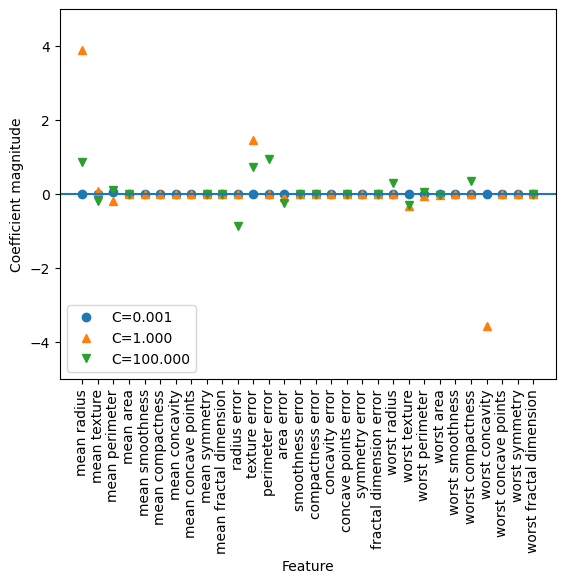

In [85]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

### Linear models for multiclass classification ###

Many linear classification models are for binary classification only, and don’t extend
naturally to the multiclass case (with the exception of logistic regression). A common
technique to extend a binary classification algorithm to a multiclass classification
algorithm is the one-vs.-rest approach. In the one-vs.-rest approach, a binary model is
learned for each class that tries to separate that class from all of the other classes,
resulting in as many binary models as there are classes. To make a prediction, all
binary classifiers are run on a test point. The classifier that has the highest score on its
single class “wins,” and this class label is returned as the prediction.

Having one binary classifier per class results in having one vector of coefficients (w)
and one intercept (b) for each class. The class for which the result of the classification
confidence formula given here is highest is the assigned class label:


In [ ]:
w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

The mathematics behind multiclass logistic regression differ somewhat from the onevs.-rest approach, but they also result in one coefficient vector and intercept per class,
and the same method of making a prediction is applied.
Let’s apply the one-vs.-rest method to a simple three-class classification dataset. We
use a two-dimensional dataset, where each class is given by data sampled from a
Gaussian distribution (see Figure 2-19)

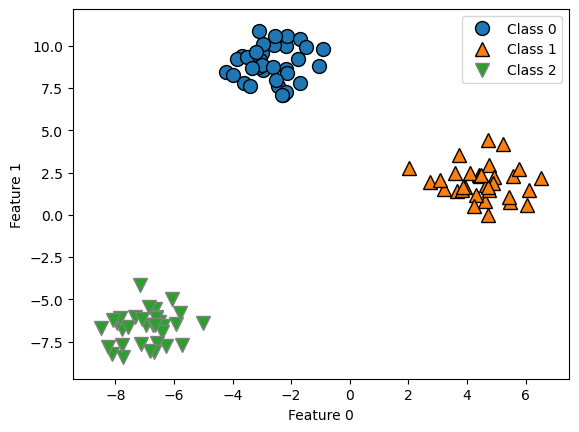

In [86]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [92]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


/Users/uli/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


We see that the shape of **the coef_ is (3, 2), meaning that each row of coef_ contains the coefficient vector for one of the three classes and each column holds the
coefficient value for a specific feature (there are two in this dataset)**. **The intercept_ is now a one-dimensional array, storing the intercepts for each class.**
Let’s visualize the lines given by the three binary classifiers (Figure 2-20):

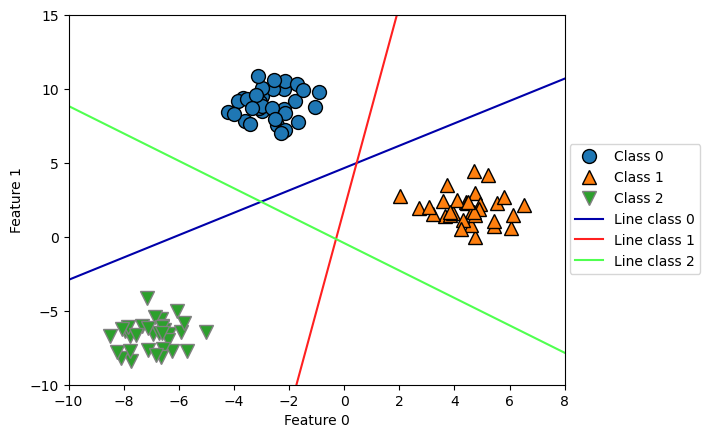

In [93]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

You can see that 
- all the points belonging to class 0 in the training data are above the
line corresponding to class 0, which means they are on the “class 0” side of this binary
classifier. 
- The points in class 0 are above the line corresponding to class 2, which
means they are classified as “rest” by the binary classifier for class 2. 
- The points belonging to class 0 are to the left of the line corresponding to class 1, which means
the binary classifier for class 1 also classifies them as “rest.” 
- Therefore, any point in this area will be classified as class 0 by the final classifier (the result of the classification confidence formula for classifier 0 is greater than zero, while it is smaller than zero for the other two classes).

***But what about the triangle in the middle of the plot? All three binary classifiers classify points there as “rest.” Which class would a point there be assigned to? The answer
is the one with the highest value for the classification formula: the class of the closest
line.***

Text(0, 0.5, 'Feature 1')

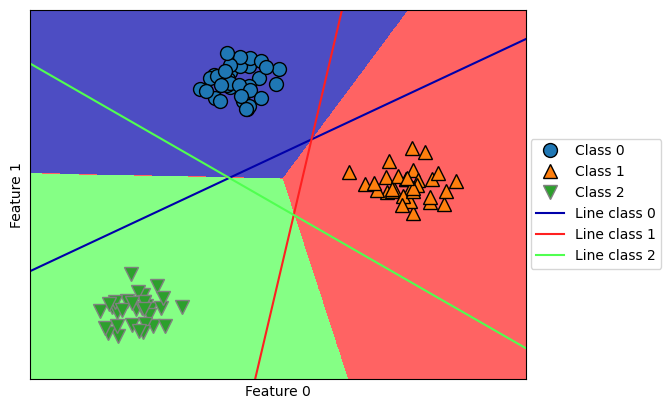

In [96]:
# The following example (Figure 2-21) shows the predictions for all regions of the 2D space:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Figure 2-21. Multiclass decision boundaries derived from the three one-vs.-rest classifiers

### Strengths, weaknesses, and parameters ###

***The main parameter of linear models is the regularization parameter, called alpha in
the regression models and C in LinearSVC and LogisticRegression. Large values for
alpha or small values for C mean simple models. In particular for the regression mod‐
els, tuning these parameters is quite important. Usually C and alpha are searched for
on a logarithmic scale. The other decision you have to make is whether you want to
use L1 regularization or L2 regularization. If you assume that only a few of your fea‐
tures are actually important, you should use L1. Otherwise, you should default to L2.
L1 can also be useful if interpretability of the model is important. As L1 will use only
a few features, it is easier to explain which features are important to the model, and
what the effects of these features are.***

**Linear models are very fast to train, and also fast to predict. They scale to very large
datasets and work well with sparse data. If your data consists of hundreds of thou‐
sands or millions of samples, you might want to investigate using the solver='sag'
option in LogisticRegression and Ridge, which can be faster than the default on
large datasets. Other options are the SGDClassifier class and the SGDRegressor
class, which implement even more scalable versions of the linear models described
here.**

Another strength of linear models is that they make it relatively easy to understand
how a prediction is made, using the formulas we saw earlier for regression and classification. Unfortunately, it is often not entirely clear why coefficients are the way they
are. This is particularly true if your dataset has highly correlated features; in these
cases, the coefficients might be hard to interpret. Linear models often perform well when the number of features is large compared to the number of samples. They are also often used on very large datasets, simply
because it’s not feasible to train other models. However, in lower-dimensional spaces,
other models might yield better generalization performance. We will look at some
examples in which linear models fail in “Kernelized Support Vector Machines” on
page 94.

### Method Chaining ###

The fit method of all scikit-learn models returns self. This allows you to write
code like the following, which we’ve already used extensively in this chapter:

In [ ]:
# instantiate model and fit it in one line
logreg = LogisticRegression().fit(X_train, y_train)

Here, we used **the return value of fit (which is self) to assign the trained model to
the variable logreg**. This **concatenation of method calls (here __init__ and then fit)
is known as method chaining**. Another common application of method chaining in
scikit-learn is to fit and predict in one line:

In [ ]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

Finally, you can even do model instantiation, fitting, and predicting in one line:

In [ ]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

This very short variant is not ideal, though. A lot is happening in a single line, which
might make the code hard to read. Additionally, the fitted logistic regression model
isn’t stored in any variable, so we can’t inspect it or use it to predict on any other data.

### Naive Bayes Classifiers ###

Naive Bayes classifiers are a family of classifiers that are quite similar to the linear
models discussed in the previous section. However, they tend to be **even faster in
training**. The price paid for this efficiency is that **naive Bayes models often provide
generalization performance that is slightly worse than that of linear classifiers like
LogisticRegression and LinearSVC.**
The reason that naive Bayes models are **so efficient is that they learn parameters by
looking at each feature individually and collect simple per-class statistics from each
feature**. There are **three kinds of naive Bayes classifiers implemented in scikit learn: GaussianNB, BernoulliNB, and MultinomialNB**. 
- GaussianNB can be applied to any continuous data, while BernoulliNB assumes binary data and MultinomialNB
assumes count data (that is, that each feature represents an integer count of something, like how often a word appears in a sentence). 
- BernoulliNB and MultinomialNB are mostly used in text data classification.
The BernoulliNB classifier counts how often every feature of each class is not zero.
This is most easily understood with an example:

In [2]:
import numpy as np
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [4]:
np.unique(y)

array([0, 1])

In [27]:
X[0]

array([0, 1, 0, 1])

In [29]:
X[0 == 0]

array([[[0, 1, 0, 1],
        [1, 0, 1, 1],
        [0, 0, 0, 1],
        [1, 0, 1, 0]]])

In [30]:
X[1 == 1]

array([[[0, 1, 0, 1],
        [1, 0, 1, 1],
        [0, 0, 0, 1],
        [1, 0, 1, 0]]])

Here, we have four data points, with four binary features each. There are two classes,
0 and 1. For class 0 (the first and third data points), the first feature is zero two times
and nonzero zero times, the second feature is zero one time and nonzero one time,
and so on. These same counts are then calculated for the data points in the second
class. Counting the nonzero entries per class in essence looks like this:

In [26]:
counts = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
    print("label:\n", label)
    print("X[y]:\n", X[y])
    print("X[y == label]:\n", X[y==label])
    print("X[y == label].sum:\n", counts[label])
    
print("Feature counts:\n", counts)

label:
 0
X[y]:
 [[0 1 0 1]
 [1 0 1 1]
 [0 1 0 1]
 [1 0 1 1]]
X[y == label]:
 [[0 1 0 1]
 [0 0 0 1]]
X[y == label].sum:
 [0 1 0 2]
label:
 1
X[y]:
 [[0 1 0 1]
 [1 0 1 1]
 [0 1 0 1]
 [1 0 1 1]]
X[y == label]:
 [[1 0 1 1]
 [1 0 1 0]]
X[y == label].sum:
 [2 0 2 1]
Feature counts:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


- The other two naive Bayes models, MultinomialNB and GaussianNB, are slightly different in what kinds of statistics they compute. **MultinomialNB takes into account the
average value of each feature for each class**, while **GaussianNB stores the average value
as well as the standard deviation of each feature for each class**.

- To make a prediction, a data point is compared to the statistics for each of the classes,
and the best matching class is predicted. Interestingly, for both MultinomialNB and BernoulliNB, this leads to a prediction formula that is of the same form as in the linear models (see “Linear models for classification” on page 58). Unfortunately, coef_
for the naive Bayes models has a somewhat different meaning than in the linear models, in that coef_ is not the same as w.

### Strengths, weaknesses, and parameters ###

- MultinomialNB and BernoulliNB have a single parameter, alpha, which controls
model complexity. **The way alpha works is that the algorithm adds to the data alpha
many virtual data points that have positive values for all the features. This results in a
“smoothing” of the statistics. A large alpha means more smoothing, resulting in less
complex models. The algorithm’s performance is relatively robust to the setting of
alpha, meaning that setting alpha is not critical for good performance. However,
tuning it usually improves accuracy somewhat.**

- GaussianNB is mostly used **on very high-dimensional data**, while the other two var‐
iants of naive Bayes are widely used for sparse count data such as text. MultinomialNB
usually performs better than BernoulliNB, particularly on datasets with a relatively
large number of nonzero features (i.e., large documents).

- The naive Bayes models share many of the strengths and weaknesses of the linear
models. They are very fast to train and to predict, and the training procedure is easy
to understand. The models work very well with high-dimensional sparse data and are
relatively robust to the parameters. Naive Bayes models are great baseline models and
are often used on very large datasets, where training even a linear model might take
too long.

### Decision Trees ###

Decision trees are **widely used models for classification and regression tasks**. Essentially, they **learn a hierarchy of if/else questions, leading to a decision.**
These questions are similar to the questions you might ask in a game of 20 Questions.
Imagine you want to distinguish between the following four animals: bears, hawks,
penguins, and dolphins. Your **goal is to get to the right answer by asking as few if/else
questions as possible**. You might start off by asking whether the animal has feathers, a
question that narrows down your possible animals to just two. If the answer is “yes,”
you can ask another question that could help you distinguish between hawks and
penguins. For example, you could ask whether the animal can fly. If the animal
doesn’t have feathers, your possible animal choices are dolphins and bears, and you
will need to ask a question to distinguish between these two animals—for example,
asking whether the animal has fins.
This series of questions can be expressed as a decision tree, as shown in Figure 2-22.

In [99]:
import sys
sys.path

['/Users/uli/Documents/Documents - Uli’s MacBook Pro/DATA SCIENCE/Data Science by Andreas Mueller Columbia',
 '/Users/uli/anaconda3/lib/python311.zip',
 '/Users/uli/anaconda3/lib/python3.11',
 '/Users/uli/anaconda3/lib/python3.11/lib-dynload',
 '',
 '/Users/uli/anaconda3/lib/python3.11/site-packages',
 '/Users/uli/anaconda3/lib/python3.11/site-packages/aeosa']

In [101]:
pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 940.7 kB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
mglearn.plots.plot_animal_tree()

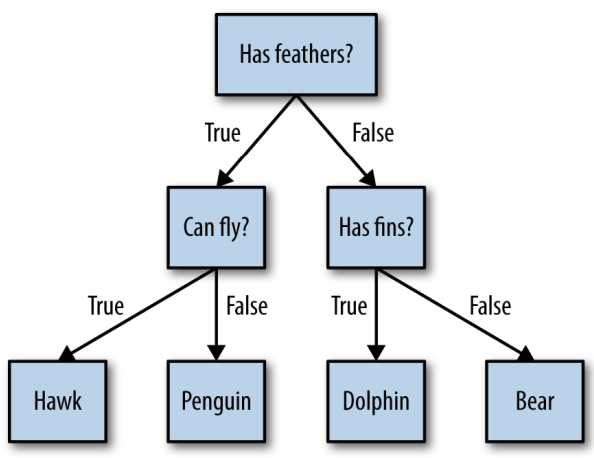

In this illustration, **each node in the tree either represents a question or a terminal
node (also called a leaf) that contains the answer**. The edges connect the answers to a
question with the next question you would ask.
In machine learning parlance, we built a model to distinguish between four classes of
animals (hawks, penguins, dolphins, and bears) using the three features “has feath‐
ers,” “can fly,” and “has fins.” Instead of building these models by hand, we can learn
them from data using supervised learning.

### Building decision trees ###

Let’s go through the process of building a decision tree for the 2D classification dataset shown in Figure 2-23. The dataset consists of two half-moon shapes, with each
class consisting of 75 data points. We will refer to this dataset as two_moons.
**Learning a decision tree means learning the sequence of if/else questions that gets us
to the true answer most quickly. In the machine learning setting, these questions are
called tests (not to be confused with the test set, which is the data we use to test to see
how generalizable our model is).** Usually data does not come in the form of binary
yes/no features as in the animal example, but is instead **represented as continuous
features** such as in the 2D dataset shown in Figure 2-23. **The tests that are used on
continuous data are of the form “Is feature i larger than value a?”**

In [ ]:
mglearn.plots.plot_tree_progressive()

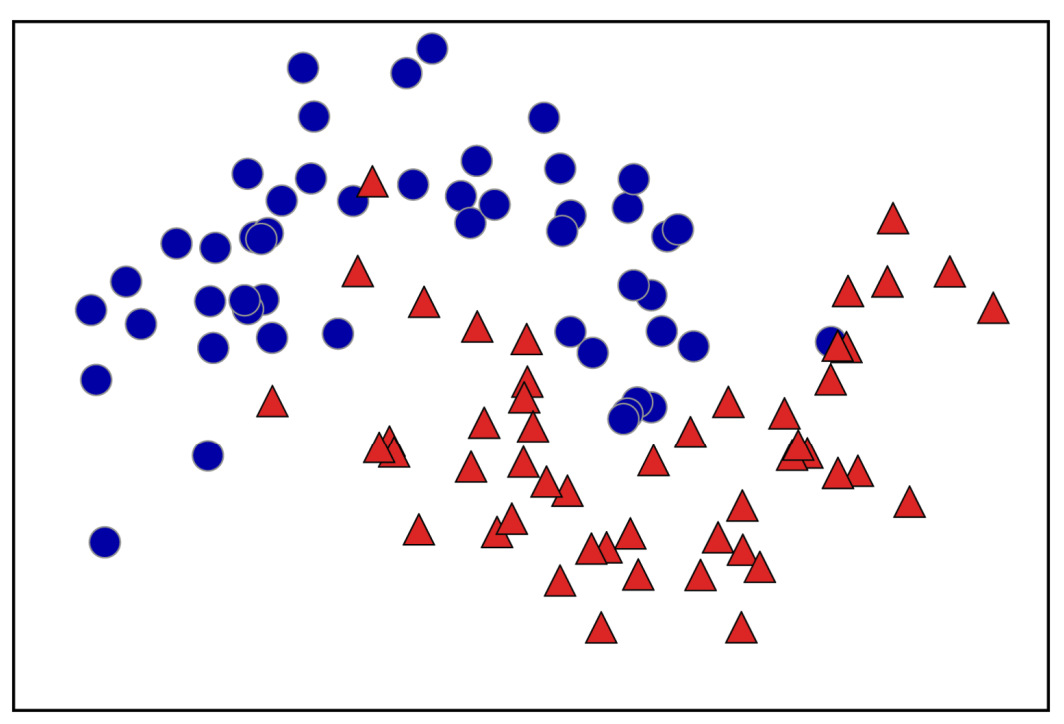

**To build a tree, the algorithm searches over all possible tests and finds the one that is
most informative about the target variable**. Figure 2-24 shows the first test that is
picked. Splitting the dataset horizontally at x[1]=0.0596 yields the most information;
it best separates the points in class 0 from the points in class 1. The top node, also
called the root, represents the whole dataset, consisting of 75 points belonging to class
0 and 75 points belonging to class 1. The split is done by testing whether x[1] <=
0.0596, indicated by a black line. If the test is true, a point is assigned to the left node,
which contains 2 points belonging to class 0 and 32 points belonging to class 1.
Otherwise the point is assigned to the right node, which contains 48 points belonging
to class 0 and 18 points belonging to class 1. These two nodes correspond to the top
and bottom regions shown in Figure 2-24. Even though the first split did a good job
of separating the two classes, the bottom region still contains points belonging to
class 0, and the top region still contains points belonging to class 1. We can build a
more accurate model by repeating the process of looking for the best test in both
regions. Figure 2-25 shows that the most informative next split for the left and the
right region is based on x[0].

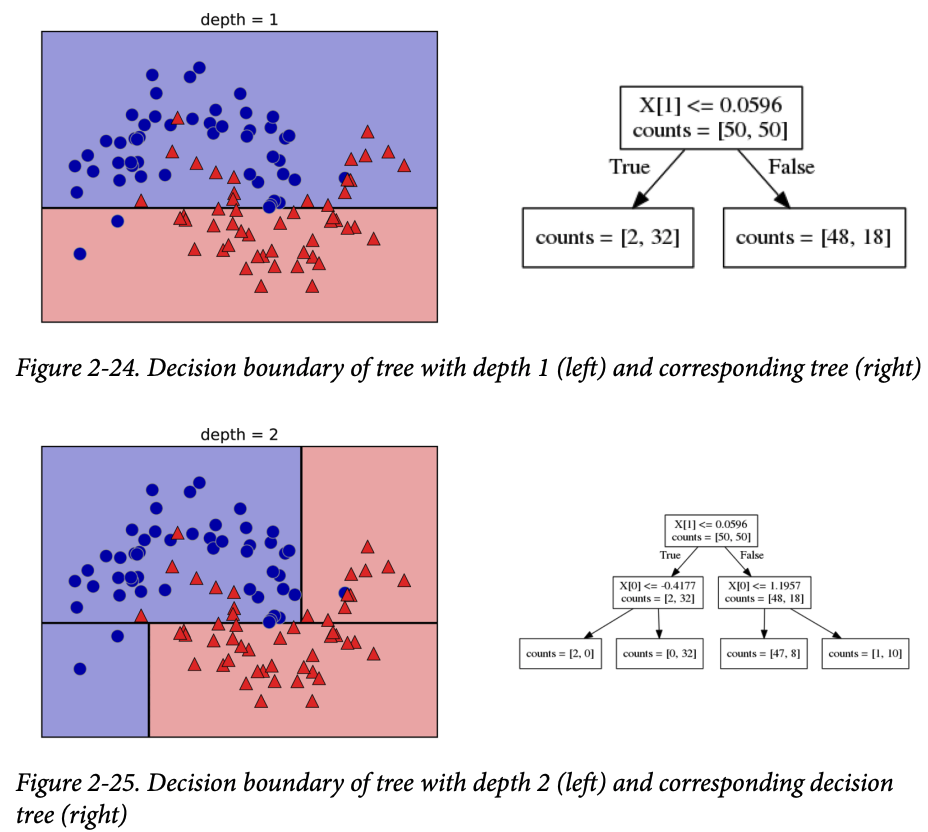

This recursive process yields a binary tree of decisions, with each node containing a
test. Alternatively, you can think of **each test as splitting the part of the data that is
currently being considered along one axis. This yields a view of the algorithm as
building a hierarchical partition. As each test concerns only a single feature, the
regions in the resulting partition always have axis-parallel boundaries.
The recursive partitioning of the data is repeated until each region in the partition
(each leaf in the decision tree) only contains a single target value (a single class or a
single regression value). A leaf of the tree that contains data points that all share the
same target value is called pure**. The final partitioning for this dataset is shown in
Figure 2-26.

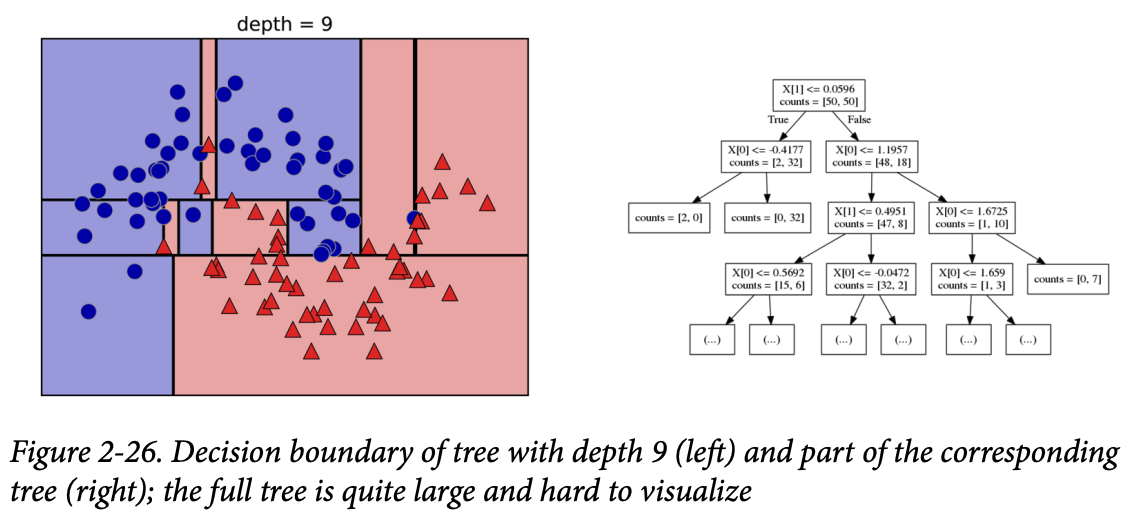

- A prediction on a new data point is made by checking which region of the partition
of the feature space the point lies in, and then predicting the majority target (or the
single target in the case of pure leaves) in that region. 
- The region can be found by
traversing the tree from the root and going left or right, depending on whether the
test is fulfilled or not.
- It is also possible to use trees for regression tasks, using exactly the same technique.
To make a prediction, we traverse the tree based on the tests in each node and find
the leaf the new data point falls into. The output for this data point is the mean target
of the training points in this leaf.

### Controlling complexity of decision trees ###

Typically, building a tree as described here and continuing until all leaves are pure
leads to models that are very complex and highly overfit to the training data. The
presence of pure leaves mean that a tree is 100% accurate on the training set; each
data point in the training set is in a leaf that has the correct majority class. The over‐
fitting can be seen on the left of Figure 2-26. You can see the regions determined to
belong to class 1 in the middle of all the points belonging to class 0. On the other
hand, there is a small strip predicted as class 0 around the point belonging to class 1
to the very right. This is not how one would imagine the decision boundary to look,
and the decision boundary focuses a lot on single outlier points that are far away
from the other points in that class.

***There are two common strategies to prevent overfitting:.*** 
- stopping the creation of the tree early (also called pre-pruning), Possible criteria for **pre-pruning include limiting the maximum depth of the tree, limiting the maximum number of leaves, or requiring a minimum number of points in a node to keep splitting it**
- or building the tree but then **removing or collapsing nodes that contain little information (also called post-pruning or just pruning).**


**Decision trees in scikit-learn are implemented in the DecisionTreeRegressor and DecisionTreeClassifier classes. scikit-learn only implements pre-pruning, not
post-pruning.**

Let’s look at the effect of pre-pruning in more detail on the Breast Cancer dataset. As
always, we import the dataset and split it into a training and a test part. Then we build
a model using the default setting of fully developing the tree (growing the tree until
all leaves are pure). We fix the random_state in the tree, which is used for tiebreaking internally:

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()

X_train, x_test, Y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on training set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on training set: 0.937


In [106]:
type(cancer)

sklearn.utils._bunch.Bunch

In [107]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [108]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

- As expected, the accuracy on the training set is 100%—because the leaves are pure,
the tree was grown deep enough that it could perfectly memorize all the labels on the
training data. 
- The test set accuracy is slightly worse than for the linear models we
looked at previously, which had around 95% accuracy.
- If we don’t restrict the depth of a decision tree, the tree can become arbitrarily deep
and complex. 
- **Unpruned trees are therefore prone to overfitting and not generalizing
well to new data.**
- Now let’s apply pre-pruning to the tree, which will stop developing
the tree before we perfectly fit to the training data. One option is to stop building the
tree after a certain depth has been reached. Here we set max_depth=4, meaning only
four consecutive questions can be asked (cf. Figures 2-24 and 2-26). Limiting the
depth of the tree decreases overfitting. This leads to a lower accuracy on the training
set, but an improvement on the test set:

In [113]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


### Analyzing decision trees ###

We can visualize the tree using the export_graphviz function from the tree module.
This writes a file in the .dot file format, which is a text file format for storing graphs.
We set an option to color the nodes to reflect the majority class in each node and pass
the class and features names so the tree can be properly labeled:

In [114]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

We can read this file and visualize it, as seen in Figure 2-27, using the graphviz mod‐
ule (or you can use any program that can read .dot files):

In [ ]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

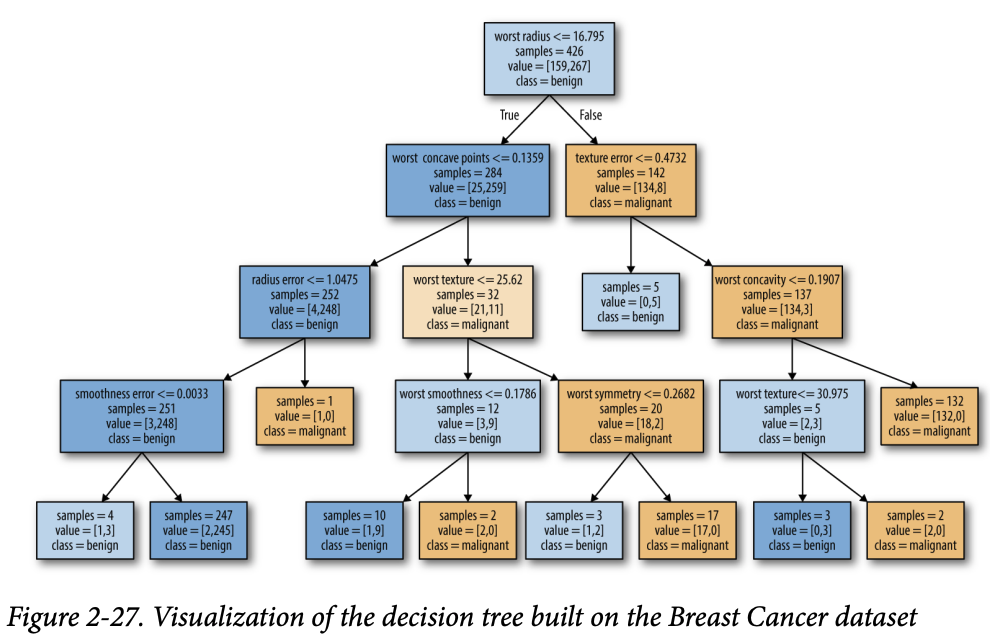

The visualization of the tree provides a great in-depth view of how the algorithm
makes predictions, and is a good example of a machine learning algorithm that is
easily explained to nonexperts. However, even with a tree of depth four, as seen here,
the tree can become a bit overwhelming. Deeper trees (a depth of 10 is not uncom‐
mon) are even harder to grasp. One method of inspecting the tree that may be helpful
is to find out which path most of the data actually takes. The samples shown in each
node in Figure 2-27 gives the number of samples in that node, while value provides
the number of samples per class. Following the branches to the right, we see that
worst radius > 16.795 creates a node that contains only 8 benign but 134 malig‐
nant samples. The rest of this side of the tree then uses some finer distinctions to split
off these 8 remaining benign samples. Of the 142 samples that went to the right in the
initial split, nearly all of them (132) end up in the leaf to the very right.
Taking a left at the root, for worst radius <= 16.795 we end up with 25 malignant
and 259 benign samples. Nearly all of the benign samples end up in the second leaf
from the left, with most of the other leaves containing very few samples.

### Feature importance in trees ###

Instead of looking at the whole tree, which can be taxing, there are some useful properties that we can derive to summarize the workings of the tree. **The most commonly
used summary is feature importance, which rates how important each feature is for
the decision a tree makes. It is a number between 0 and 1 for each feature, where 0
means “not used at all” and 1 means “perfectly predicts the target.” The feature
importances always sum to 1:**

In [116]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (2,) and arg 3 with shape (30,).

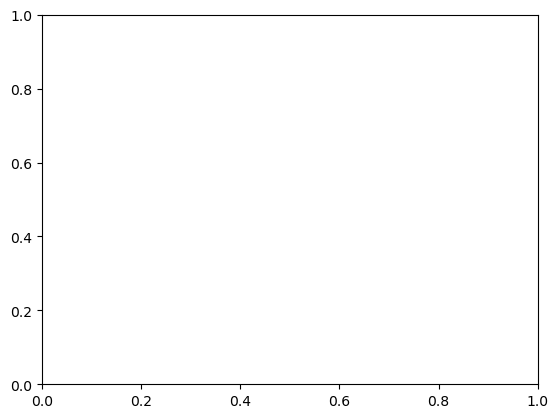

In [37]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Figure 2-28. Feature importances computed from a decision tree learned on the Breast
Cancer dataset

Here we see that the feature used in the top split (“worst radius”) is by far the most
important feature. This confirms our observation in analyzing the tree that the first
level already separates the two classes fairly well.
However, if a feature has a low value in feature_importance_, it doesn’t mean that
this feature is uninformative. It only means that the feature was not picked by the
tree, likely because another feature encodes the same information.
In contrast to the coefficients in linear models, feature importances are always posi‐
tive, and don’t encode which class a feature is indicative of. The feature importances
tell us that “worst radius” is important, but not whether a high radius is indicative of a
sample being benign or malignant. In fact, there might not be such a simple relation‐
ship between features and class, as you can see in the following example (Figures 2-29
and 2-30):

In [ ]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

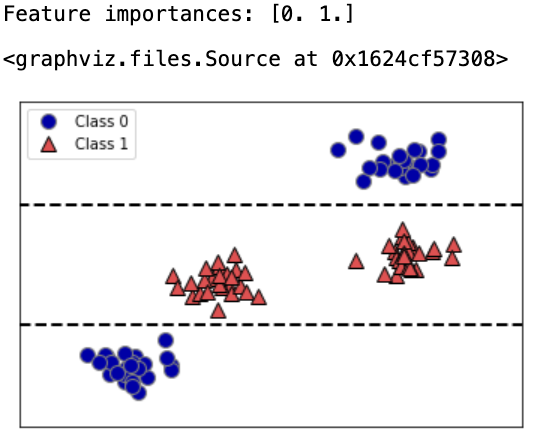

Figure 2-29. A two-dimensional dataset in which the feature on the y-axis has a nonmo‐
notonous relationship with the class label, and the decision boundaries found by a deci‐
sion tree

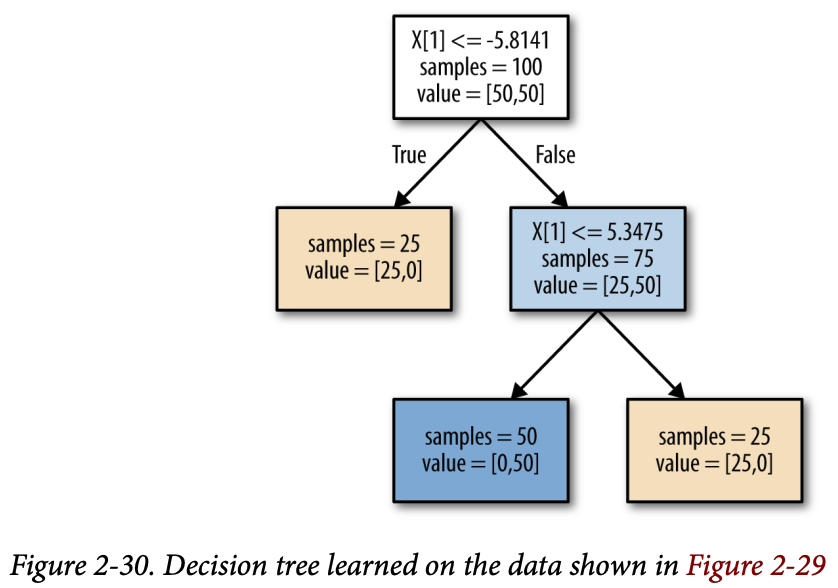

The plot shows a dataset with two features and two classes. Here, all the information
is contained in X[1], and X[0] is not used at all. But the relation between X[1] and the output class is not monotonous, meaning we cannot say “a high value of X[1]
means class 0, and a low value means class 1” (or vice versa).

While we focused our discussion here on decision trees for classification, all that was
said is similarly true for decision trees for regression, as implemented in Decision
TreeRegressor. The usage and analysis of regression trees is very similar to that of
classification trees. There is one particular property of using tree-based models for
regression that we want to point out, though. The DecisionTreeRegressor (and all
other tree-based regression models) is not able to extrapolate, or make predictions
outside of the range of the training data.
Let’s look into this in more detail, using a dataset of historical computer memory
(RAM) prices. Figure 2-31 shows the dataset, with the date on the x-axis and the price
of one megabyte of RAM in that year on the y-axis:

Text(0, 0.5, 'Price in $/Mbyte')

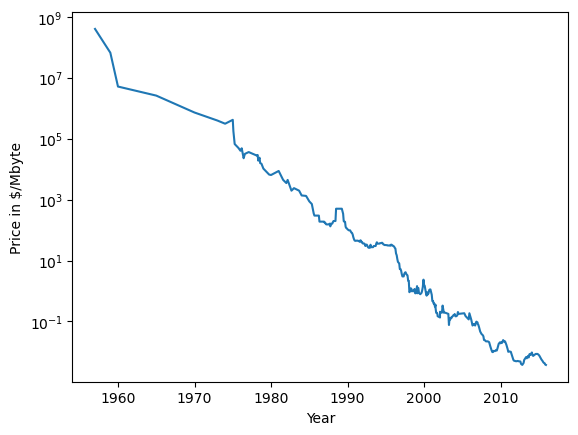

In [5]:
import mglearn
import matplotlib.pyplot as plt
import os
import pandas as pd
# DATA_PATH = os.path.join(os.path.dirname(__file__), "..", "data")
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

Note the logarithmic scale of the y-axis. When plotting logarithmically, the relation
seems to be quite linear and so should be relatively easy to predict, apart from some
bumps.

We will make a forecast for the years after 2000 using the historical data up to that
point, with the date as our only feature. We will compare two simple models: a
DecisionTreeRegressor and LinearRegression. We rescale the prices using a loga‐
rithm, so that the relationship is relatively linear. This doesn’t make a difference for
the DecisionTreeRegressor, but it makes a big difference for LinearRegression (we
will discuss this in more depth in Chapter 4). After training the models and making
predictions, we apply the exponential map to undo the logarithm transform. We
make predictions on the whole dataset for visualization purposes here, but for a
quantitative evaluation we would only consider the test dataset:

In [21]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]
data_train

Unnamed: 0     date         price
0             0  1957.00  4.110418e+08
1             1  1959.00  6.794772e+07
2             2  1960.00  5.242880e+06
3             3  1965.00  2.642412e+06
4             4  1970.00  7.340030e+05
..          ...      ...           ...
197         197  1999.50  7.800000e-01
198         198  1999.67  8.700000e-01
199         199  1999.75  1.040000e+00
200         200  1999.83  1.340000e+00
201         201  1999.92  2.350000e+00

[202 rows x 3 columns]

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

In [ ]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

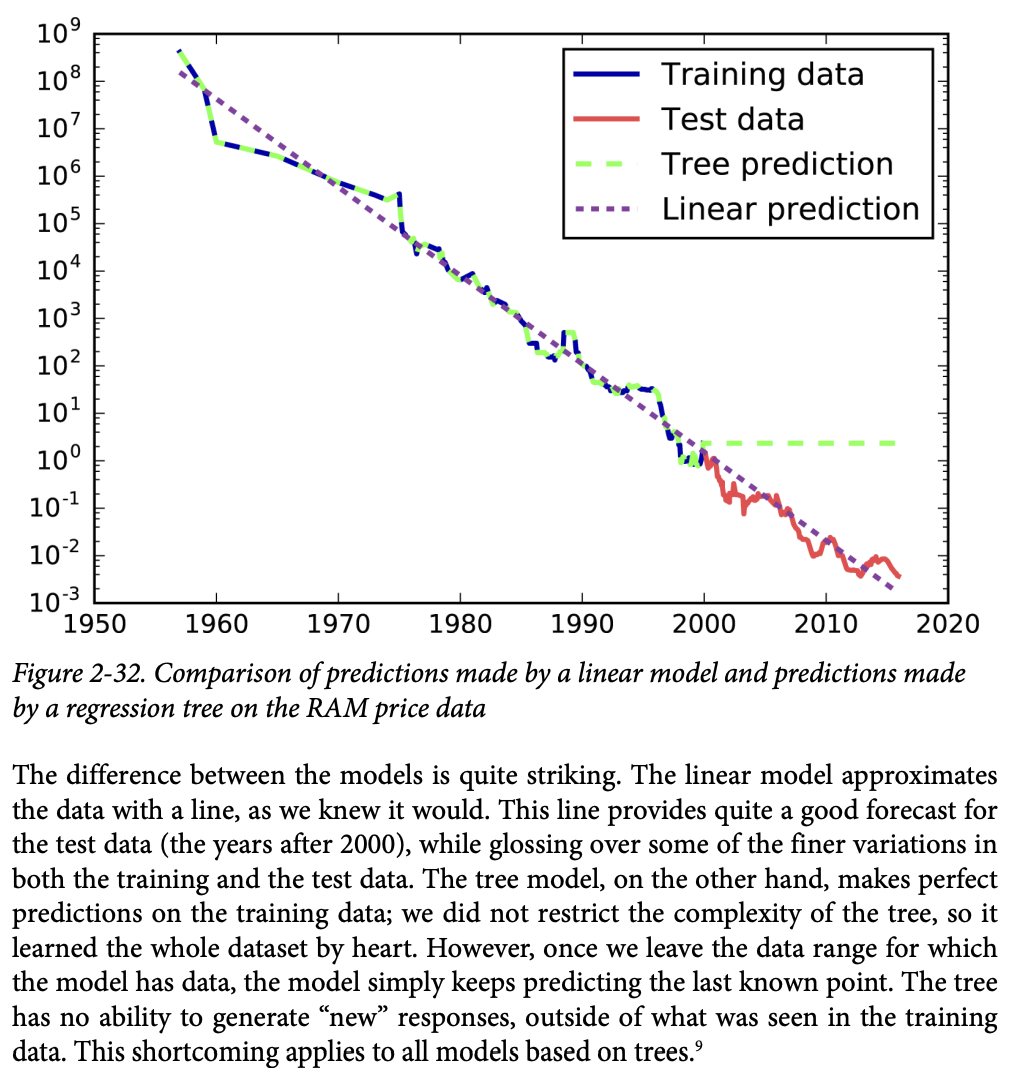

### Ensembles of Decision Trees ###

**1. Random forests**

Building random forests. To build a random forest model, you need to decide on the
number of trees to build (the n_estimators parameter of RandomForestRegressor or
RandomForestClassifier).

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

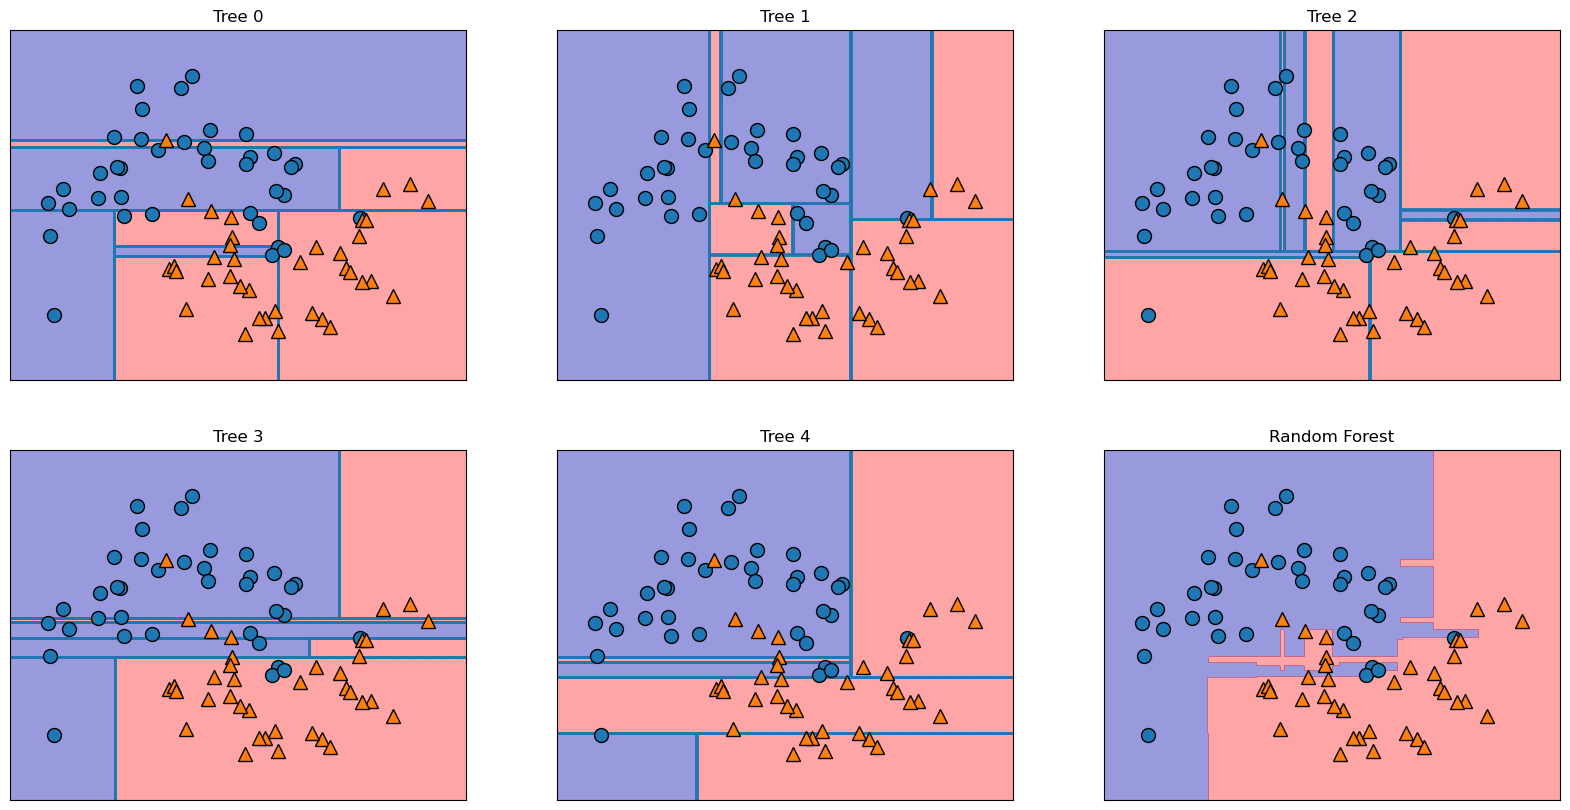

In [31]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [35]:
# As another example, let’s apply a random forest consisting of 100 trees on the Breast Cancer dataset:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


The random forest gives us an accuracy of 97%, better than the linear models or a
single decision tree, without tuning any parameters. We could adjust the max_fea
tures setting, or apply pre-pruning as we did for the single decision tree. However,
often the default parameters of the random forest already work quite well.
Similarly to the decision tree, the random forest provides feature importances, which
are computed by aggregating the feature importances over the trees in the forest. Typ‐
ically, the feature importances provided by the random forest are more reliable than
the ones provided by a single tree. Take a look at Figure 2-34.

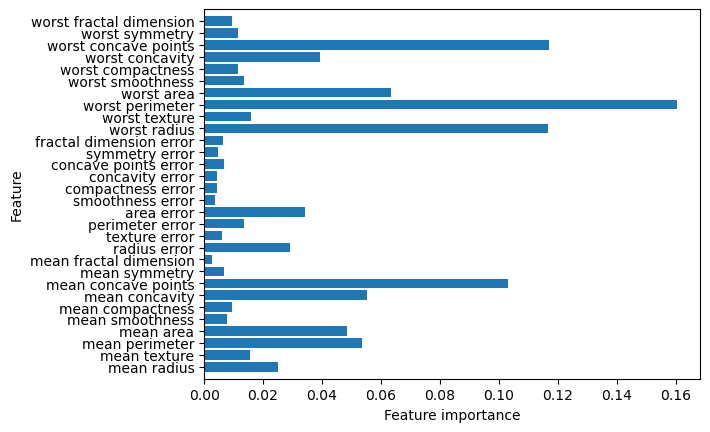

In [38]:
plot_feature_importances_cancer(forest)

As you can see, the random forest gives nonzero importance to many more features
than the single tree. Similarly to the single decision tree, the random forest also gives
a lot of importance to the “worst radius” feature, but it actually chooses “worst perim‐
eter” to be the most informative feature overall. The randomness in building the ran‐
dom forest forces the algorithm to consider many possible explanations, the result
being that the random forest captures a much broader picture of the data than a sin‐
gle tree.

### Gradient boosted regression trees (gradient boosting machines) ###

In contrast to the random forest approach, gradient boosting works by building trees in a serial man‐
ner, where each tree tries to correct the mistakes of the previous one. By default, there
is no randomization in gradient boosted regression trees; instead, strong pre-pruning
is used. Gradient boosted trees often use very shallow trees, of depth one to five,
which makes the model smaller in terms of memory and makes predictions faster.

The main idea behind gradient boosting is to combine many simple models (in this
context known as weak learners), like shallow trees. Each tree can only provide good
predictions on part of the data, and so more and more trees are added to iteratively
improve performance.
Gradient boosted trees are frequently the winning entries in machine learning com‐
petitions, and are widely used in industry. They are generally a bit more sensitive to
parameter settings than random forests, but can provide better accuracy if the param‐
eters are set correctly.
Apart from the pre-pruning and the number of trees in the ensemble, another impor‐
tant parameter of gradient boosting is the learning_rate, which controls how
strongly each tree tries to correct the mistakes of the previous trees. A higher learning
rate means each tree can make stronger corrections, allowing for more complex mod‐
els. Adding more trees to the ensemble, which can be accomplished by increasing
n_estimators, also increases the model complexity, as the model has more chances
to correct mistakes on the training set.
Here is an example of using GradientBoostingClassifier on the Breast Cancer
dataset. By default, 100 trees of maximum depth 3 and a learning rate of 0.1 are used:

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


As the training set accuracy is 100%, we are likely to be overfitting. To reduce overfit‐
ting, we could either apply stronger pre-pruning by limiting the maximum depth or
lower the learning rate:

In [40]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [41]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


Both methods of decreasing the model complexity reduced the training set accuracy,
as expected. In this case, lowering the maximum depth of the trees provided a signifi‐
cant improvement of the model, while lowering the learning rate only increased the
generalization performance slightly.
As for the other decision tree–based models, we can again visualize the feature
importances to get more insight into our model (Figure 2-35). As we used 100 trees, it
is impractical to inspect them all, even if they are all of depth 1:

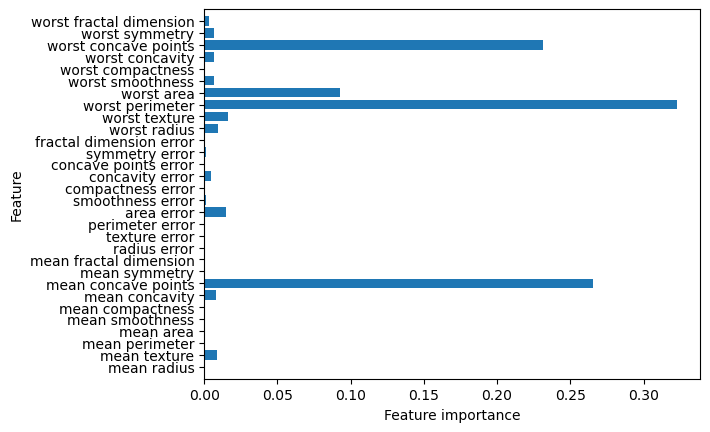

In [42]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

### Kernelized Support Vector Machines ### 

Kernelized support vector machines
(often just referred to as SVMs) are an extension that allows for more complex mod‐
els that are not defined simply by hyperplanes in the input space. While there are sup‐
port vector machines for classification and regression, we will restrict ourselves to the
classification case, as implemented in SVC. Similar concepts apply to support vector
regression, as implemented in SVR.

#### Linear models and nonlinear features ####

As you saw in Figure 2-15, linear models can be quite limiting in low-dimensional
spaces, as lines and hyperplanes have limited flexibility. One way to make a linear
model more flexible is by adding more features—for example, by adding interactions
or polynomials of the input features.
Let’s look at the synthetic dataset we used in “Feature importance in trees” on page 79
(see Figure 2-29):

Text(0, 0.5, 'Feature 1')

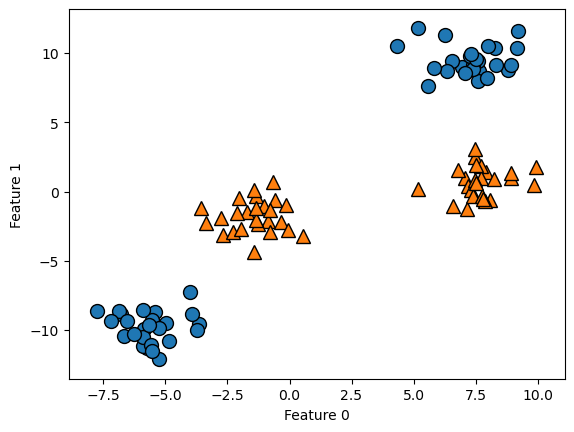

In [44]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

A linear model for classification can only separate points using a line, and will not be
able to do a very good job on this dataset (see Figure 2-37):

/Users/uli/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/uli/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(0, 0.5, 'Feature 1')

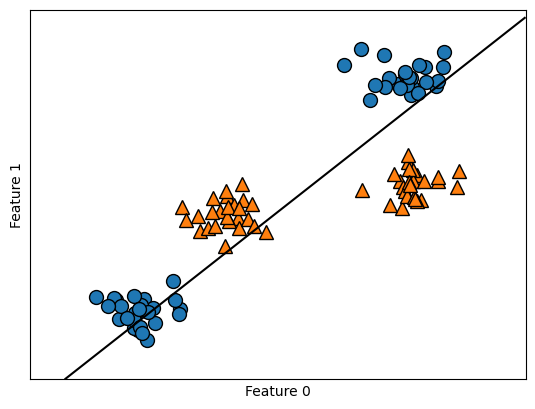

In [45]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Now let’s expand the set of input features, say by also adding feature1 ** 2, the
square of the second feature, as a new feature. Instead of representing each data point
as a two-dimensional point, (feature0, feature1), we now represent it as a threedimensional point, (feature0, feature1, feature1 ** 2).
10 This new representa‐
tion is illustrated in Figure 2-38 in a three-dimensional scatter plot:

In [50]:

# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

/var/folders/44/5n4nnxn55398wxb7759km40r0000gn/T/ipykernel_1722/83432347.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
/var/folders/44/5n4nnxn55398wxb7759km40r0000gn/T/ipykernel_1722/83432347.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',


Text(0.5, 0, 'feature1 ** 2')

<Figure size 640x480 with 0 Axes>

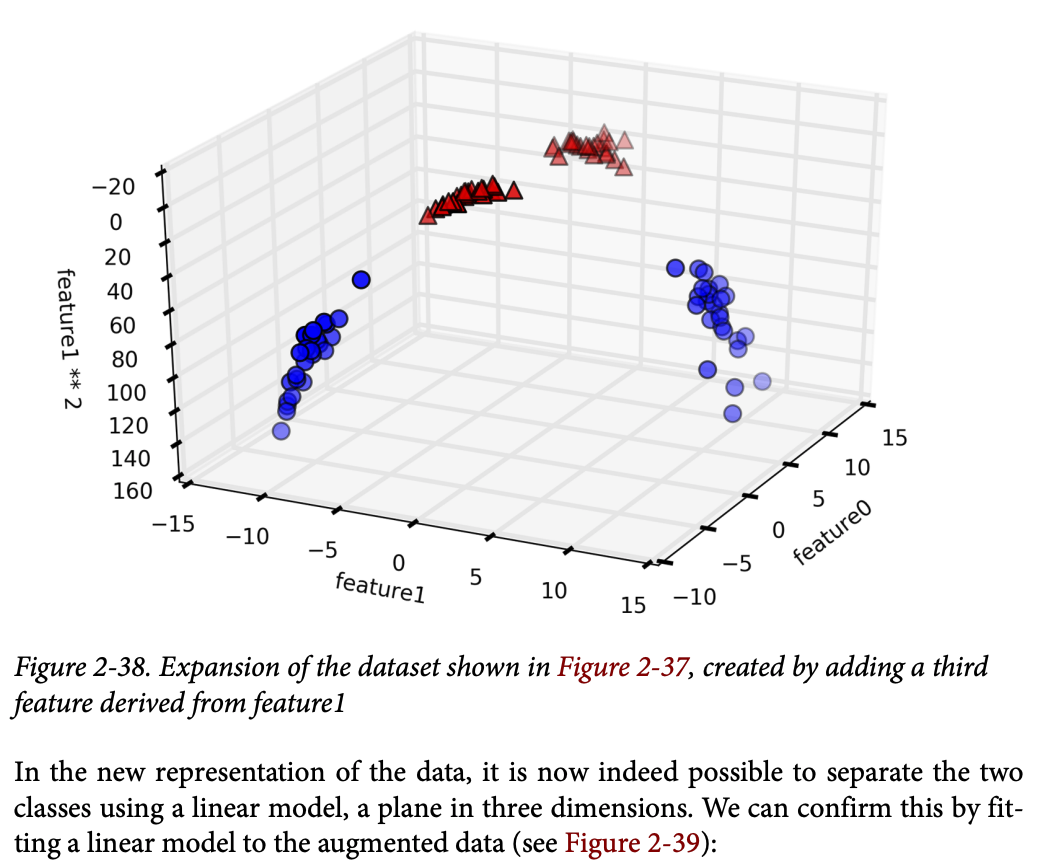

In the new representation of the data, it is now indeed possible to separate the two
classes using a linear model, a plane in three dimensions. We can confirm this by fit‐
ting a linear model to the augmented data (see Figure 2-39):

In [51]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
 cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
 cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

/Users/uli/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/uli/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/var/folders/44/5n4nnxn55398wxb7759km40r0000gn/T/ipykernel_1722/2105709626.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
/var/folders/44/5n4nnxn55398wxb7759km40r0000gn/T/ipykernel_1722/2105709626.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',


Text(0.5, 0, 'feature1 ** 2')

<Figure size 640x480 with 0 Axes>

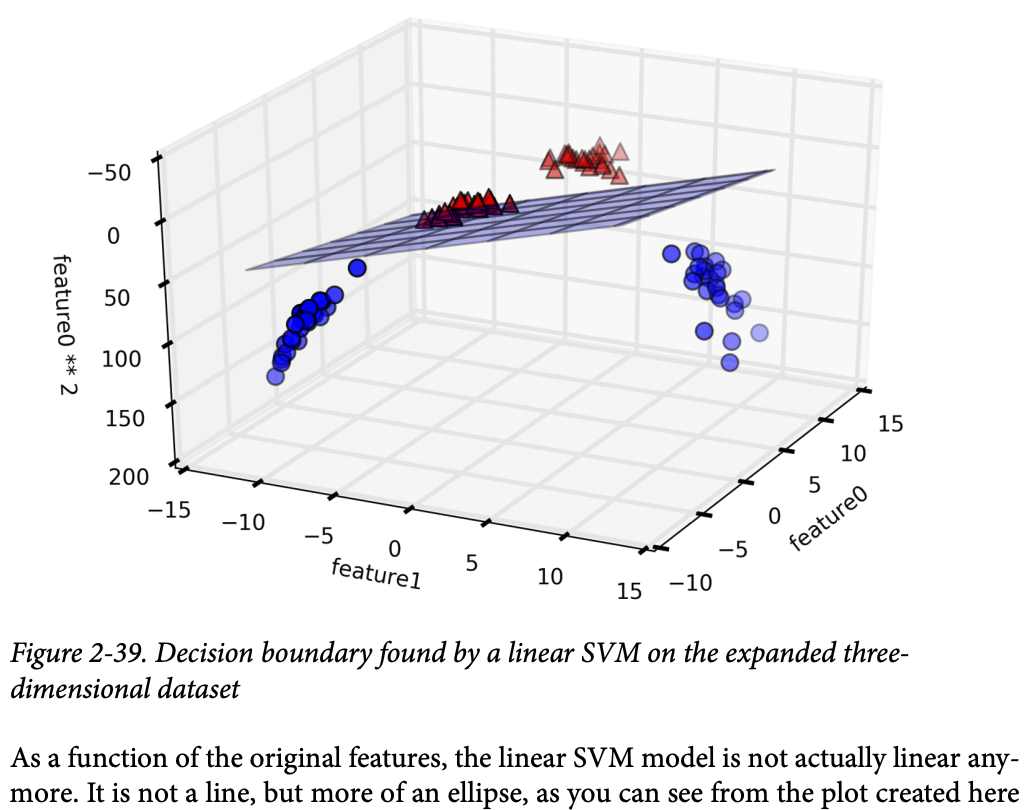

Text(0, 0.5, 'Feature 1')

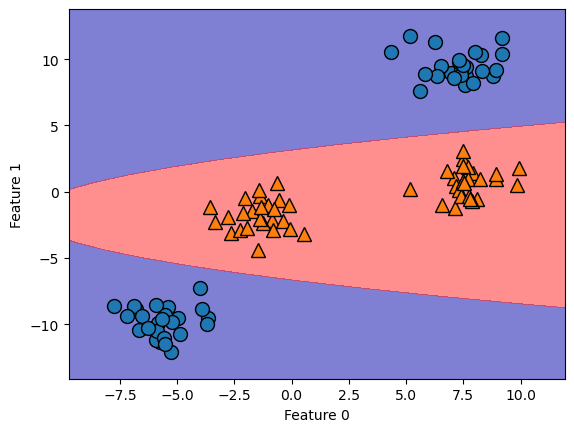

In [52]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

**The kernel trick**

The lesson here is that adding nonlinear features to the representation of our data can
make linear models much more powerful. However, often we don’t know which fea‐
tures to add, and adding many features (like all possible interactions in a 100-
dimensional feature space) might make computation very expensive. Luckily, there is
a clever mathematical trick that allows us to learn a classifier in a higher-dimensional
space without actually computing the new, possibly very large representation. This is
known as the kernel trick, and it works by directly computing the distance (more pre‐
cisely, the scalar products) of the data points for the expanded feature representation,
without ever actually computing the expansion.
There are two ways to map your data into a higher-dimensional space that are com‐
monly used with support vector machines: the polynomial kernel, which computes all
possible polynomials up to a certain degree of the original features (like feature1 **
2 * feature2 ** 5); and the radial basis function (RBF) kernel, also known as the
Gaussian kernel. The Gaussian kernel is a bit harder to explain, as it corresponds to
an infinite-dimensional feature space. One way to explain the Gaussian kernel is that it considers all possible polynomials of all degrees, but the importance of the features
decreases for higher degrees.11
In practice, the mathematical details behind the kernel SVM are not that important,
though, and how an SVM with an RBF kernel makes a decision can be summarized
quite easily—we’ll do so in the next section.

**Understanding SVMs**

During training, the SVM learns how important each of the training data points is to
represent the decision boundary between the two classes. Typically only a subset of
the training points matter for defining the decision boundary: the ones that lie on the
border between the classes. These are called support vectors and give the support vec‐
tor machine its name.
To make a prediction for a new point, the distance to each of the support vectors is
measured. A classification decision is made based on the distances to the support vec‐
tor, and the importance of the support vectors that was learned during training
(stored in the dual_coef_ attribute of SVC).
The distance between data points is measured by the Gaussian kernel:

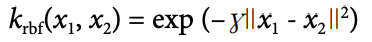

Here, x1
 and x2 are data points, ǁ x1
 - x2 ǁ denotes Euclidean distance, and ɣ (gamma)
is a parameter that controls the width of the Gaussian kernel.

Figure 2-41 shows the result of training a support vector machine on a twodimensional two-class dataset. The decision boundary is shown in black, and the sup‐
port vectors are larger points with the wide outline. The following code creates this
plot by training an SVM on the forge dataset:

Text(0, 0.5, 'Feature 1')

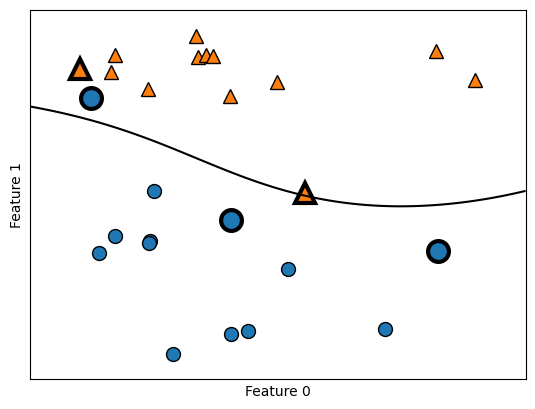

In [53]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In this case, the SVM yields a very smooth and nonlinear (not a straight line) bound‐
ary. We adjusted two parameters here: the C parameter and the gamma parameter,
which we will now discuss in detail.

**Tuning SVM parameters**

The gamma parameter is the one shown in the formula given in the previous section,
which corresponds to the inverse of the width of the Gaussian kernel. Intuitively, the
gamma parameter determines how far the influence of a single training example rea‐
ches, with low values meaning corresponding to a far reach, and high values to a limi‐
ted reach. In other words, the wider the radius of the Gaussian kernel, the further the
influence of each training example. The C parameter is a regularization parameter,
similar to that used in the linear models. It limits the importance of each point (or
more precisely, their dual_coef_).
Let’s have a look at what happens when we vary these parameters (Figure 2-42):

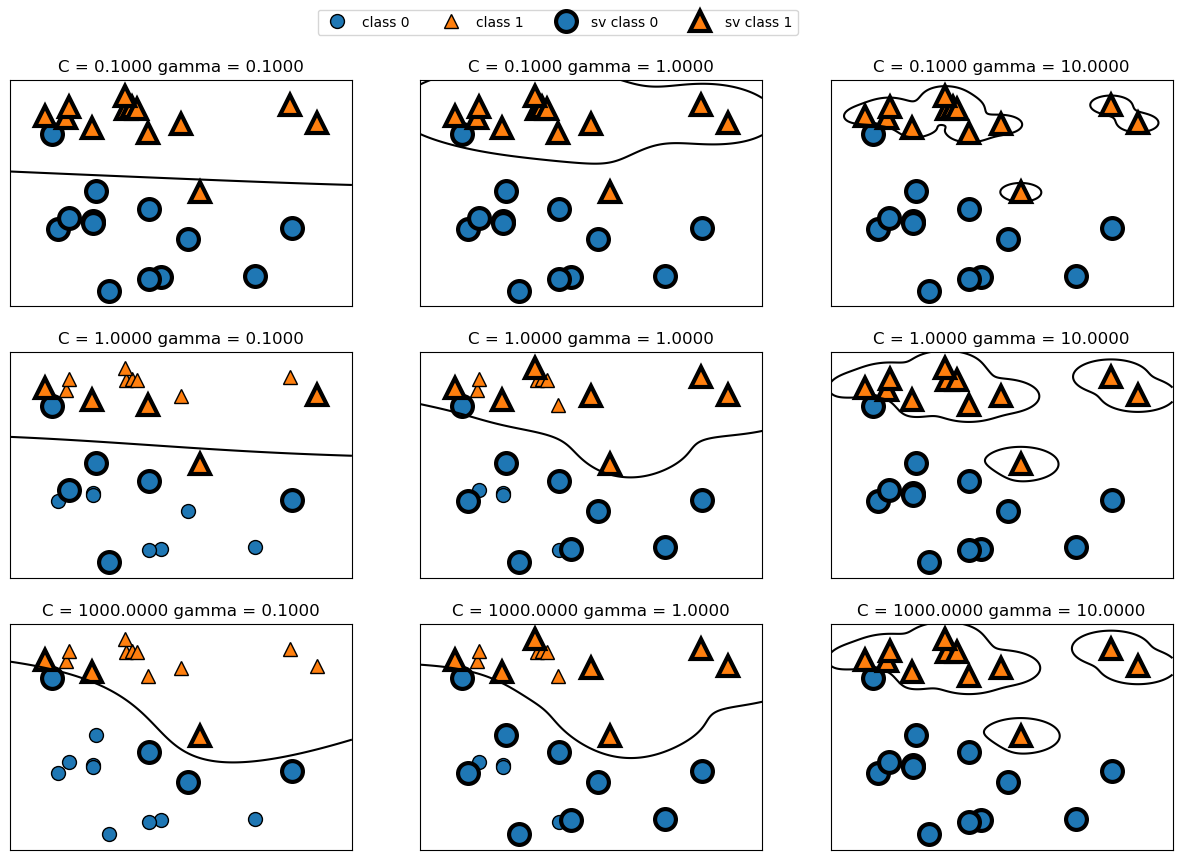

In [54]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

Going from left to right, we increase the value of the parameter gamma from 0.1 to 10.
A small gamma means a large radius for the Gaussian kernel, which means that many
points are considered close by. This is reflected in very smooth decision boundaries
on the left, and boundaries that focus more on single points further to the right. A
low value of gamma means that the decision boundary will vary slowly, which yields a
model of low complexity, while a high value of gamma yields a more complex model.
Going from top to bottom, we increase the C parameter from 0.1 to 1000. As with the
linear models, a small C means a very restricted model, where each data point can
only have very limited influence. You can see that at the top left the decision bound‐
ary looks nearly linear, with the misclassified points barely having any influence on
the line. Increasing C, as shown on the bottom left, allows these points to have a
stronger influence on the model and makes the decision boundary bend to correctly
classify them.

Let’s apply the RBF kernel SVM to the Breast Cancer dataset. By default, C=1 and
gamma=1/n_features:

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.90
Accuracy on test set: 0.94


The model overfits quite substantially, with a perfect score on the training set and
only 63% accuracy on the test set. While SVMs often perform quite well, they are
very sensitive to the settings of the parameters and to the scaling of the data. In par‐
ticular, they require all the features to vary on a similar scale. Let’s look at the mini‐
mum and maximum values for each feature, plotted in log-space (Figure 2-43):

Text(0, 0.5, 'Feature magnitude')

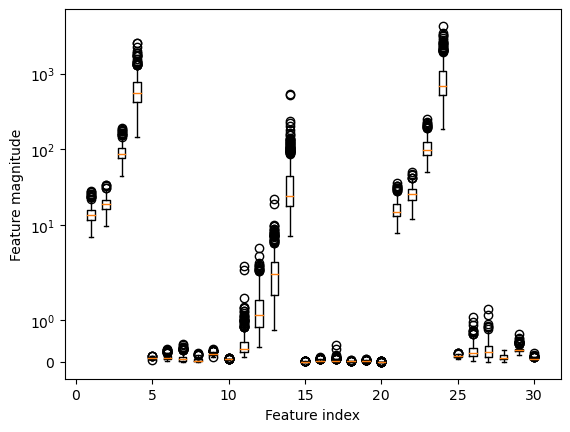

In [56]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

**Preprocessing data for SVMs**

One way to resolve this problem is by rescaling each feature so that they are all
approximately on the same scale. A common rescaling method for kernel SVMs is to
scale the data such that all features are between 0 and 1. We will see how to do this
using the MinMaxScaler preprocessing method in Chapter 3, where we’ll give more
details. For now, let’s do this “by hand”:

In [58]:
# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n", X_train_scaled.min(axis=0))
print("Maximum for each feature\n", X_train_scaled.max(axis=0))

Minimum for each feature
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [60]:
# use THE SAME transformation on the test set,
# using min and range of the training set (see Chapter 3 for details)
X_test_scaled = (X_test - min_on_training) / range_on_training

In [61]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
 svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.972


Scaling the data made a huge difference! Now we are actually in an underfitting
regime, where training and test set performance are quite similar but less close to
100% accuracy. From here, we can try increasing either C or gamma to fit a more com‐
plex model. For example:

In [62]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
 svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


Here, increasing C allows us to improve the model significantly, resulting in 97.2%
accuracy

## Neural Networks (Deep Learning) ##

A family of algorithms known as neural networks has recently seen a revival under
the name “deep learning.” While deep learning shows great promise in many machine
learning applications, deep learning algorithms are often tailored very carefully to a
specific use case. Here, we will only discuss some relatively simple methods, namely
multilayer perceptrons for classification and regression, that can serve as a starting
point for more involved deep learning methods. Multilayer perceptrons (MLPs) are
also known as (vanilla) feed-forward neural networks, or sometimes just neural
networks.

**The neural network model**

MLPs can be viewed as generalizations of linear models that perform multiple stages
of processing to come to a decision.

Remember that the prediction by a linear regressor is given as:
    
ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

In plain English, ŷ is a weighted sum of the input features x[0] to x[p], weighted by
the learned coefficients w[0] to w[p]. We could visualize this graphically as shown in
Figure 2-44:

display(mglearn.plots.plot_logistic_regression_graph())

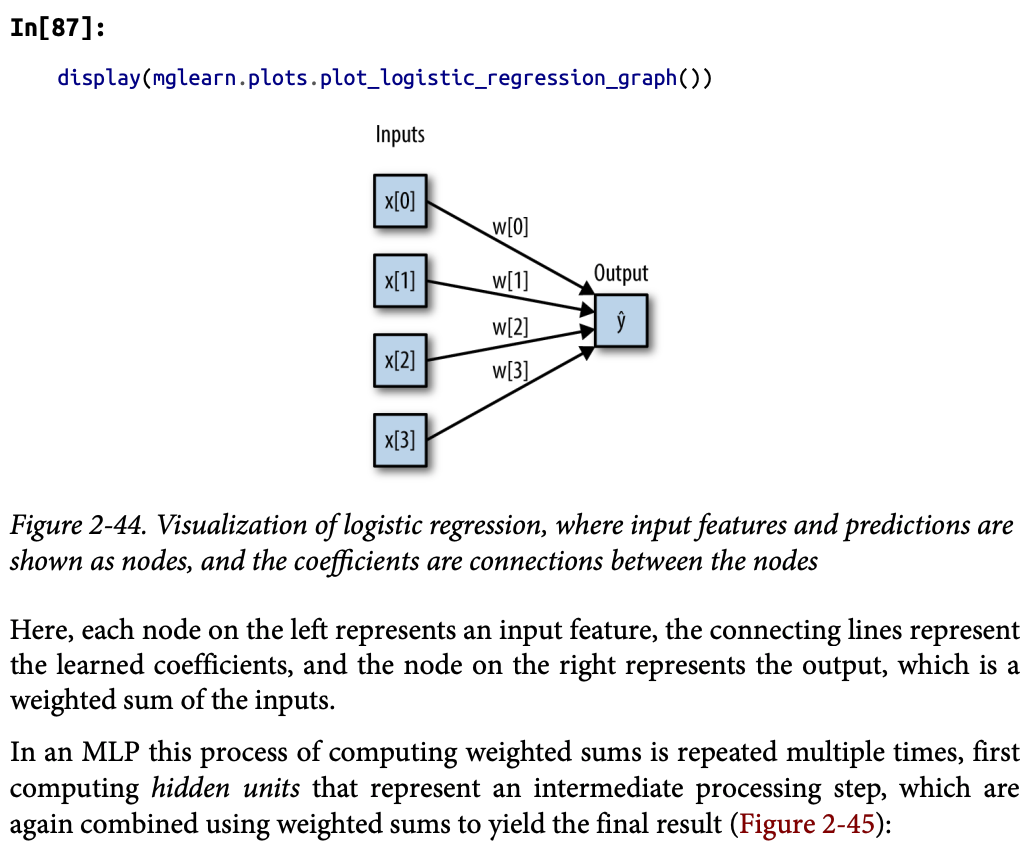


In [ ]:
display(mglearn.plots.plot_single_hidden_layer_graph())

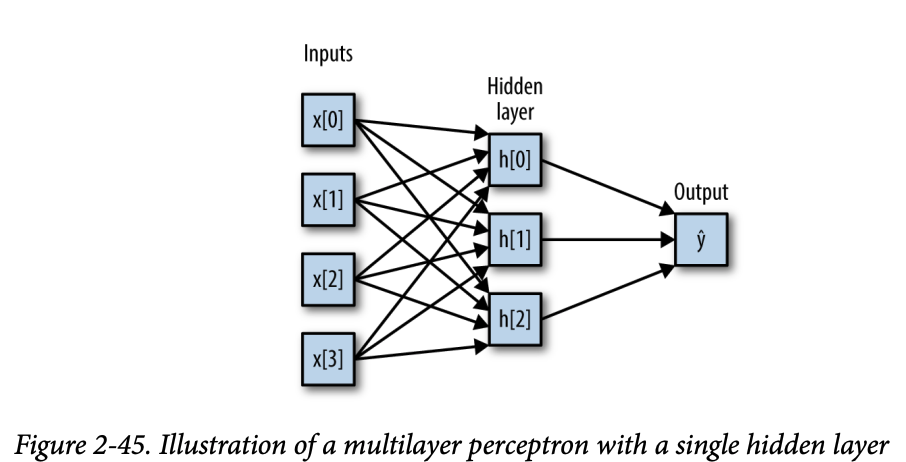

This model has a lot more coefficients (also called weights) to learn: there is one
between every input and every hidden unit (which make up the hidden layer), and
one between every unit in the hidden layer and the output.
Computing a series of weighted sums is mathematically the same as computing just
one weighted sum, so to make this model truly more powerful than a linear model,
we need one extra trick. After computing a weighted sum for each hidden unit, a
nonlinear function is applied to the result—usually the rectifying nonlinearity (also
known as rectified linear unit or relu) or the tangens hyperbolicus (tanh). The result of
this function is then used in the weighted sum that computes the output, ŷ. The two
functions are visualized in Figure 2-46. The relu cuts off values below zero, while tanh
saturates to –1 for low input values and +1 for high input values. Either nonlinear
function allows the neural network to learn much more complicated functions than a
linear model could:

This model has a lot more coefficients (also called weights) to learn: there is one
between every input and every hidden unit (which make up the hidden layer), and
one between every unit in the hidden layer and the output.
Computing a series of weighted sums is mathematically the same as computing just
one weighted sum, so to make this model truly more powerful than a linear model,
we need one extra trick. After computing a weighted sum for each hidden unit, a
nonlinear function is applied to the result—usually the rectifying nonlinearity (also
known as rectified linear unit or relu) or the tangens hyperbolicus (tanh). The result of
this function is then used in the weighted sum that computes the output, ŷ. The two
functions are visualized in Figure 2-46. The relu cuts off values below zero, while tanh
saturates to –1 for low input values and +1 for high input values. Either nonlinear
function allows the neural network to learn much more complicated functions than a
linear model could:

Text(0, 0.5, 'relu(x), tanh(x)')

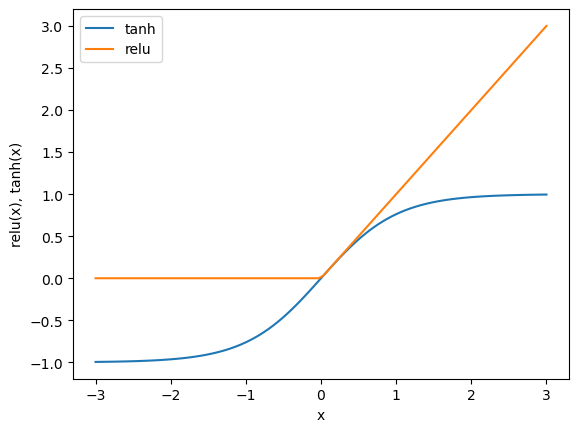

In [64]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

Figure 2-46. e hyperbolic tangent activation function and the rectified linear activa‐
tion function

For the small neural network pictured in Figure 2-45, the full formula for computing
ŷ in the case of regression would be (when using a tanh nonlinearity):

h[0] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3] + b[0])

h[1] = tanh(w[0, 1] * x[0] + w[1, 1] * x[1] + w[2, 1] * x[2] + w[3, 1] * x[3] + b[1])

h[2] = tanh(w[0, 2] * x[0] + w[1, 2] * x[1] + w[2, 2] * x[2] + w[3, 2] * x[3] + b[2])

ŷ = v[0] * h[0] + v[1] * h[1] + v[2] * h[2] + b

Here, w are the weights between the input x and the hidden layer h, and v are the
weights between the hidden layer h and the output ŷ. The weights v and w are learned
from data, x are the input features, ŷ is the computed output, and h are intermediate
computations. An important parameter that needs to be set by the user is the number
of nodes in the hidden layer. This can be as small as 10 for very small or simple data‐
sets and as big as 10,000 for very complex data. It is also possible to add additional
hidden layers, as shown in Figure 2-47:

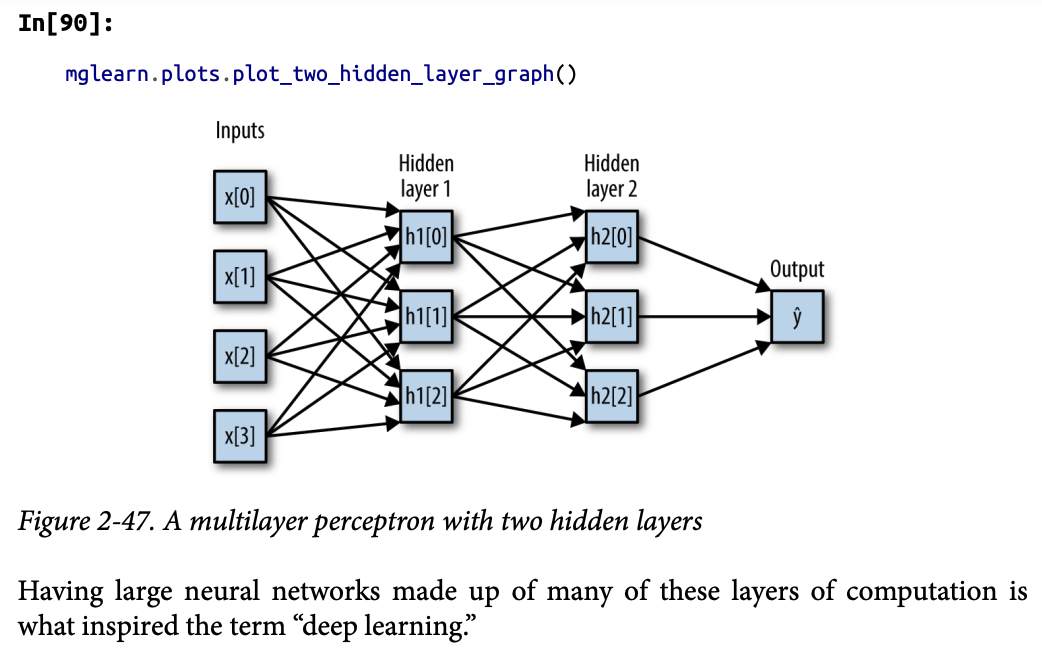

**Tuning neural networks**

Let’s look into the workings of the MLP by applying the MLPClassifier to the
two_moons dataset we used earlier in this chapter. The results are shown in
Figure 2-48:

Text(0, 0.5, 'Feature 1')

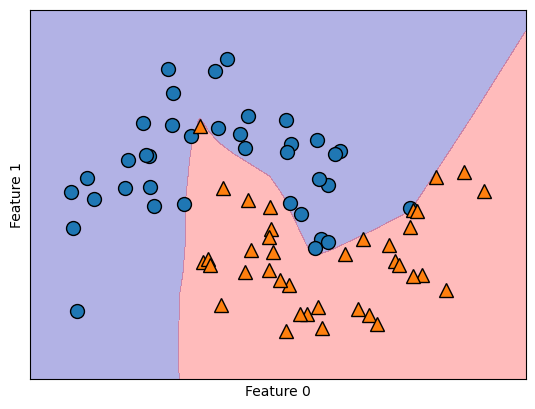

In [65]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
 random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Figure 2-48. Decision boundary learned by a neural network with 100 hidden units on
the two_moons dataset

As you can see, the neural network learned a very nonlinear but relatively smooth
decision boundary. We used solver='lbfgs', which we will discuss later.
By default, the MLP uses 100 hidden nodes, which is quite a lot for this small dataset.
We can reduce the number (which reduces the complexity of the model) and still get
a good result (Figure 2-49):

/Users/uli/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

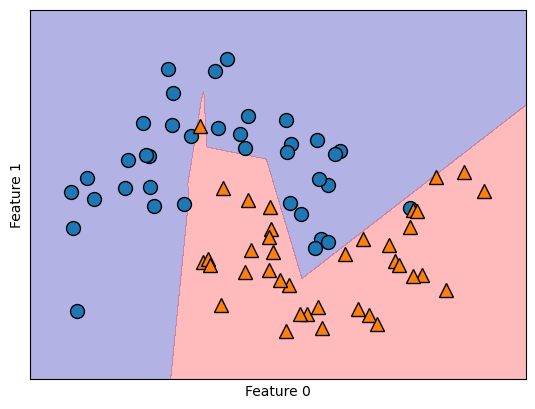

In [66]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Figure 2-49. Decision boundary learned by a neural network with 10 hidden units on
the two_moons dataset

With only 10 hidden units, the decision boundary looks somewhat more ragged. The
default nonlinearity is relu, shown in Figure 2-46. With a single hidden layer, this
means the decision function will be made up of 10 straight line segments. If we want
a smoother decision boundary, we could add more hidden units (as in Figure 2-48),
add a second hidden layer (Figure 2-50), or use the tanh nonlinearity (Figure 2-51):

Text(0, 0.5, 'Feature 1')

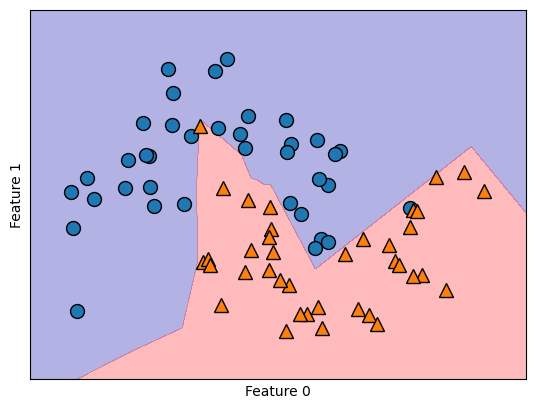

In [67]:
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0,
 hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

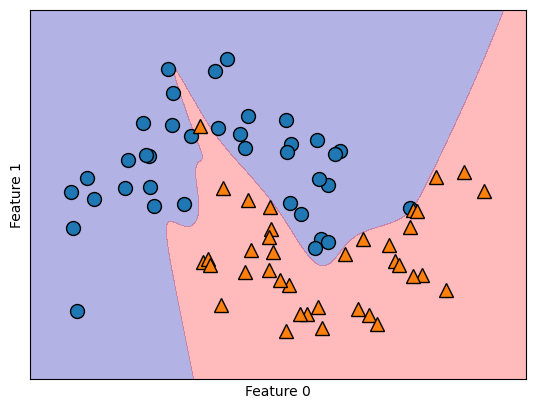

In [68]:
# using two hidden layers, with 10 units each, now with tanh nonlinearity
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
 random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Finally, we can also control the complexity of a neural network by using an l2 penalty
to shrink the weights toward zero, as we did in ridge regression and the linear classifi‐
ers. The parameter for this in the MLPClassifier is alpha (as in the linear regression
models), and it’s set to a very low value (little regularization) by default. Figure 2-52
shows the effect of different values of alpha on the two_moons dataset, using two hid‐
den layers of 10 or 100 units each:

/Users/uli/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


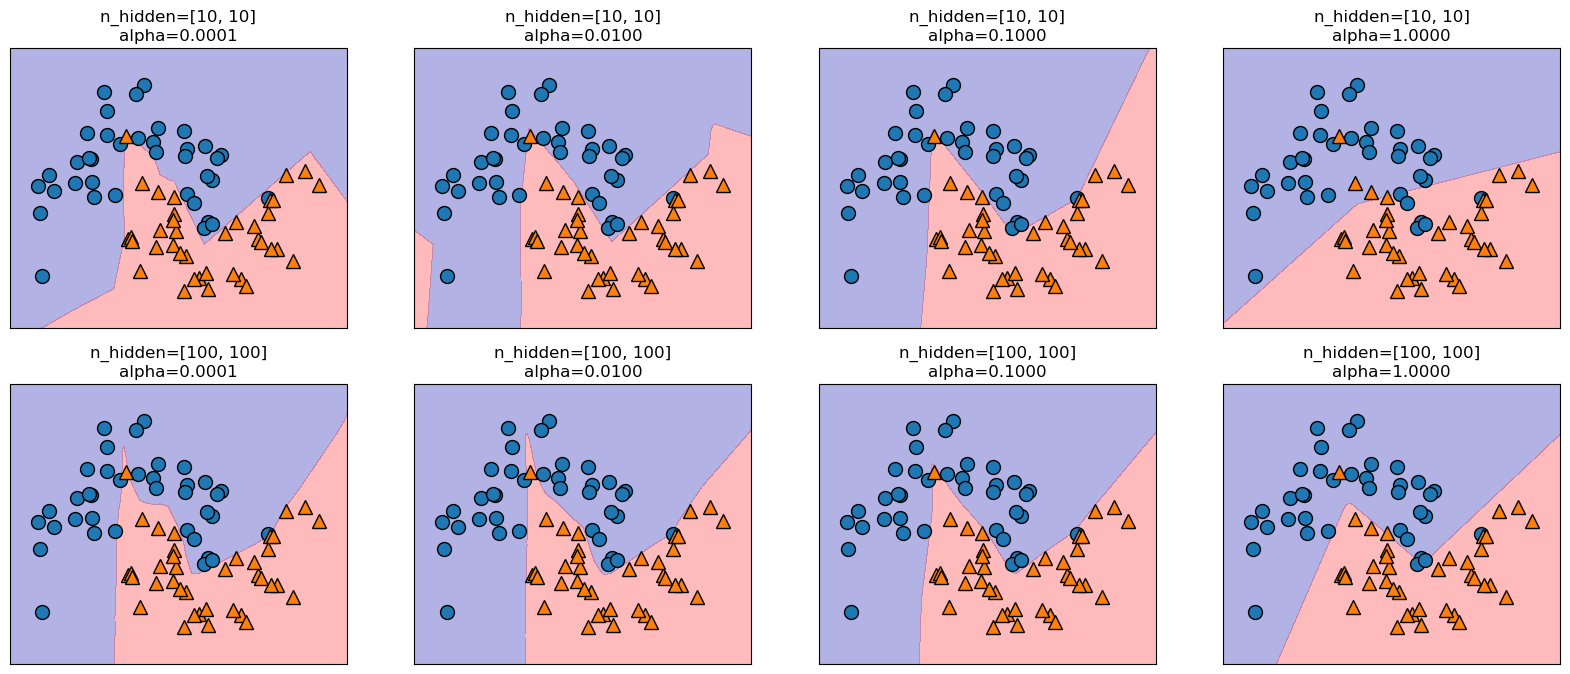

In [70]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

As you probably have realized by now, there are many ways to control the complexity
of a neural network: the number of hidden layers, the number of units in each hidden
layer, and the regularization (alpha). There are actually even more, which we won’t
go into here.
An important property of neural networks is that their weights are set randomly
before learning is started, and this random initialization affects the model that is
learned. That means that even when using exactly the same parameters, we can
obtain very different models when using different random seeds. If the networks are
large, and their complexity is chosen properly, this should not affect accuracy too
much, but it is worth keeping in mind (particularly for smaller networks).
Figure 2-53 shows plots of several models, all learned with the same settings of the
parameters:

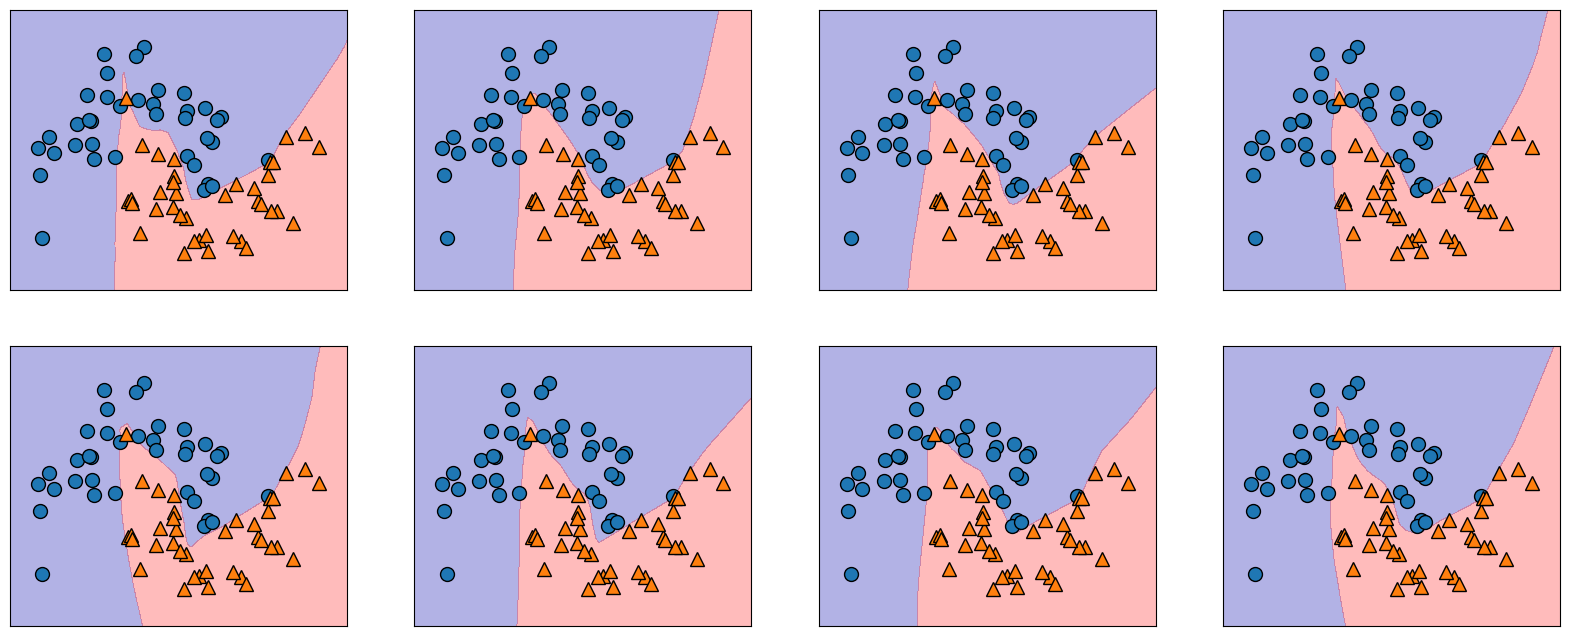

In [71]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

To get a better understanding of neural networks on real-world data, let’s apply the
MLPClassifier to the Breast Cancer dataset. We start with the default parameters:

In [72]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


The accuracy of the MLP is quite good, but not as good as the other models. As in the
earlier SVC example, this is likely due to scaling of the data. Neural networks also
expect all input features to vary in a similar way, and ideally to have a mean of 0, and a variance of 1. We must rescale our data so that it fulfills these requirements. Again,
we will do this by hand here, but we’ll introduce the StandardScaler to do this auto‐
matically in Chapter 3:

In [74]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


/Users/uli/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The results are much better after scaling, and already quite competitive. We got a
warning from the model, though, that tells us that the maximum number of iterations
has been reached. This is part of the adam algorithm for learning the model, and tells
us that we should increase the number of iterations:

In [75]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
 mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


Increasing the number of iterations only increased the training set performance, not
the generalization performance. Still, the model is performing quite well. As there is
some gap between the training and the test performance, we might try to decrease the
model’s complexity to get better generalization performance. Here, we choose to
increase the alpha parameter (quite aggressively, from 0.0001 to 1) to add stronger
regularization of the weights:

In [76]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
 mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


This leads to a performance on par with the best models so far.12
While it is possible to analyze what a neural network has learned, this is usually much
trickier than analyzing a linear model or a tree-based model. One way to introspect
what was learned is to look at the weights in the model. You can see an example of
this in the scikit-learn example gallery. For the Breast Cancer dataset, this might
be a bit hard to understand. The following plot (Figure 2-54) shows the weights that
were learned connecting the input to the first hidden layer. The rows in this plot cor‐
respond to the 30 input features, while the columns correspond to the 100 hidden
units. Light colors represent large positive values, while dark colors represent nega‐
tive values:

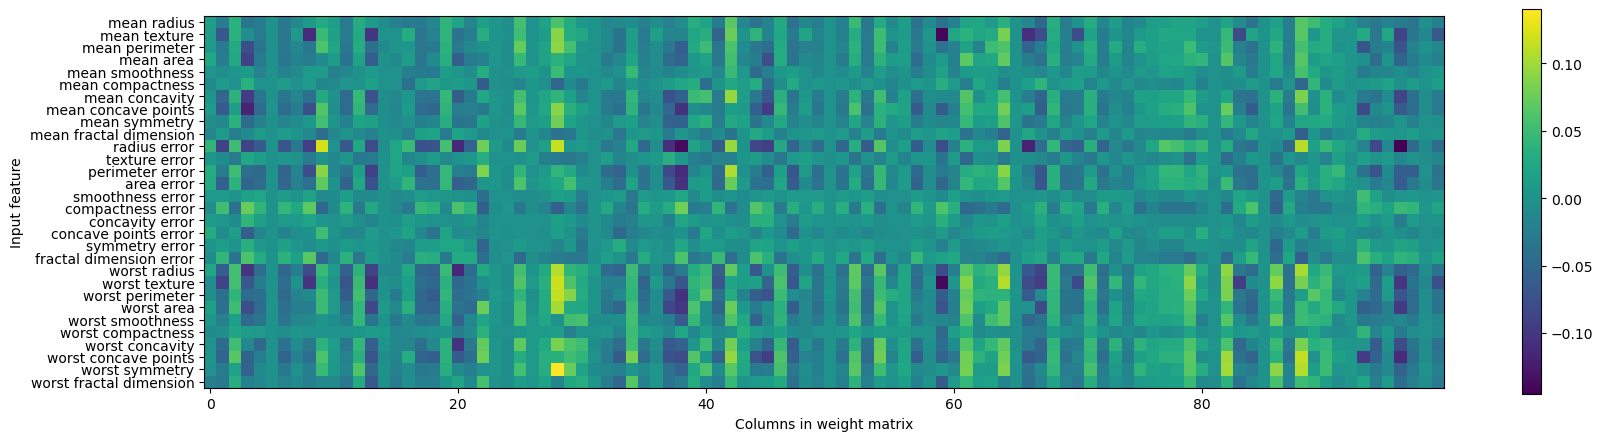

In [77]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

Figure 2-54. Heat map of the first layer weights in a neural network learned on the Breast Cancer dataset

One possible inference we can make is that features that have very small weights for
all of the hidden units are “less important” to the model. We can see that “mean
smoothness” and “mean compactness,” in addition to the features found between
“smoothness error” and “fractal dimension error,” have relatively low weights com‐
pared to other features. This could mean that these are less important features or pos‐
sibly that we didn’t represent them in a way that the neural network could use.
We could also visualize the weights connecting the hidden layer to the output layer,
but those are even harder to interpret.
While the MLPClassifier and MLPRegressor provide easy-to-use interfaces for the
most common neural network architectures, they only capture a small subset of what
is possible with neural networks. If you are interested in working with more flexible
or larger models, we encourage you to look beyond scikit-learn into the fantastic
deep learning libraries that are out there. For Python users, the most well-established
are keras, lasagna, and tensor-flow. lasagna builds on the theano library, while
keras can use either tensor-flow or theano. These libraries provide a much more
flexible interface to build neural networks and track the rapid progress in deep learn‐
ing research. All of the popular deep learning libraries also allow the use of highperformance graphics processing units (GPUs), which scikit-learn does not
support. Using GPUs allows us to accelerate computations by factors of 10x to 100x,
and they are essential for applying deep learning methods to large-scale datasets.

### Uncertainty Estimates from Classifiers ###

Another useful part of the scikit-learn interface that we haven’t talked about yet is
the ability of classifiers to provide uncertainty estimates of predictions. Often, you are
not only interested in which class a classifier predicts for a certain test point, but also
how certain it is that this is the right class. In practice, different kinds of mistakes lead
to very different outcomes in real-world applications. Imagine a medical application
testing for cancer. Making a false positive prediction might lead to a patient undergo‐
ing additional tests, while a false negative prediction might lead to a serious disease
not being treated. We will go into this topic in more detail in Chapter 6.
There are two different functions in scikit-learn that can be used to obtain uncer‐
tainty estimates from classifiers: decision_function and predict_proba. Most (but
not all) classifiers have at least one of them, and many classifiers have both. Let’s look
at what these two functions do on a synthetic two-dimensional dataset, when build‐
ing a GradientBoostingClassifier classifier, which has both a decision_function
and a predict_proba method:

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# we rename the classes "blue" and "red" for illustration purposes:
y_named = np.array(["blue", "red"])[y]

# we can call train_test_split with arbitrarily many arrays;
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

#### The Decision Function ####

In the binary classification case, the return value of decision_function is of shape
(n_samples,), and it returns one floating-point number for each sample:

In [79]:
print("X_test.shape:", X_test.shape)
print("Decision function shape:",
      gbrt.decision_function(X_test).shape)

X_test.shape: (25, 2)
Decision function shape: (25,)


This value encodes how strongly the model believes a data point to belong to the
“positive” class, in this case class 1. Positive values indicate a preference for the posi‐
tive class, and negative values indicate a preference for the “negative” (other) class:

In [80]:
# show the first few entries of decision_function
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6]))

Decision function:
[ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


We can recover the prediction by looking only at the sign of the decision function:

In [81]:
print("Thresholded decision function:\n{}".format(
 gbrt.decision_function(X_test) > 0))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


For binary classification, the “negative” class is always the first entry of the classes_
attribute, and the “positive” class is the second entry of classes_. So if you want to
fully recover the output of predict, you need to make use of the classes_ attribute:

In [82]:
# make the boolean True/False into 0 and 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# use 0 and 1 as indices into classes_
pred = gbrt.classes_[greater_zero]
# pred is the same as the output of gbrt.predict
print("pred is equal to predictions: {}".format(
 np.all(pred == gbrt.predict(X_test))))

pred is equal to predictions: True


In [83]:
# The range of decision_function can be arbitrary, and depends on the data and the model parameters:
decision_function = gbrt.decision_function(X_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(
 np.min(decision_function), np.max(decision_function)))

Decision function minimum: -7.69 maximum: 4.29


This arbitrary scaling makes the output of decision_function often hard to
interpret.

In the following example we plot the decision_function for all points in the 2D
plane using a color coding, next to a visualization of the decision boundary, as we saw
earlier. We show training points as circles and test data as triangles (Figure 2-55):

/var/folders/44/5n4nnxn55398wxb7759km40r0000gn/T/ipykernel_1722/3348843658.py:17: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cbar.draw_all()


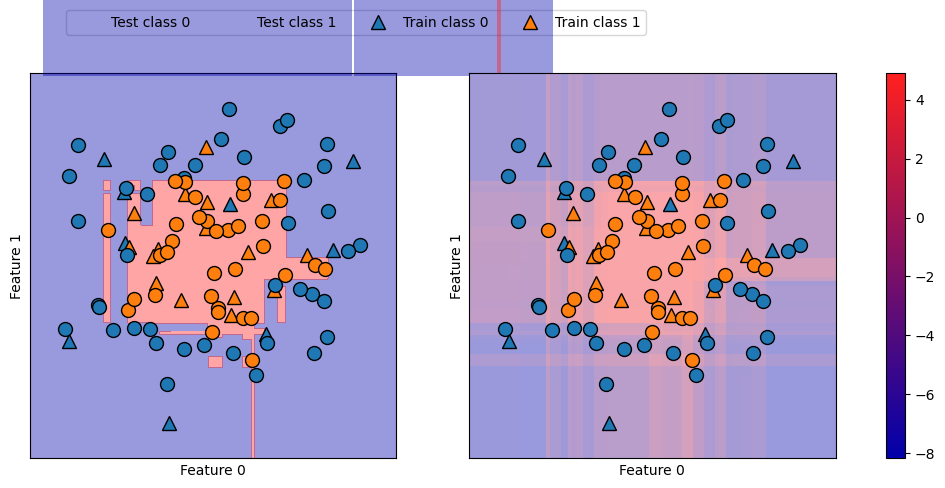

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))

Encoding not only the predicted outcome but also how certain the classifier is pro‐
vides additional information. However, in this visualization, it is hard to make out the
boundary between the two classes.

### Predicting Probabilities ###

The output of predict_proba is a probability for each class, and is often more easily
understood than the output of decision_function. It is always of shape (n_samples,
2) for binary classification:

In [87]:
print("Shape of probabilities: {}".format(gbrt.predict_proba(X_test).shape))

Shape of probabilities: (25, 2)


The first entry in each row is the estimated probability of the first class, and the sec‐
ond entry is the estimated probability of the second class. Because it is a probability,
the output of predict_proba is always between 0 and 1, and the sum of the entries
for both classes is always 1:

In [88]:
# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(
 gbrt.predict_proba(X_test[:6])))

Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


Because the probabilities for the two classes sum to 1, exactly one of the classes will
be above 50% certainty. That class is the one that is predicted.13
You can see in the previous output that the classifier is relatively certain for most
points. How well the uncertainty actually reflects uncertainty in the data depends on
the model and the parameters. A model that is more overfitted tends to make more
certain predictions, even if they might be wrong. A model with less complexity usu‐
ally has more uncertainty in its predictions. A model is called calibrated if the
reported uncertainty actually matches how correct it is—in a calibrated model, a pre‐
diction made with 70% certainty would be correct 70% of the time.
In the following example (Figure 2-56) we again show the decision boundary on the
dataset, next to the class probabilities for the class 1:

/var/folders/44/5n4nnxn55398wxb7759km40r0000gn/T/ipykernel_1722/3327960320.py:19: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cbar.draw_all()


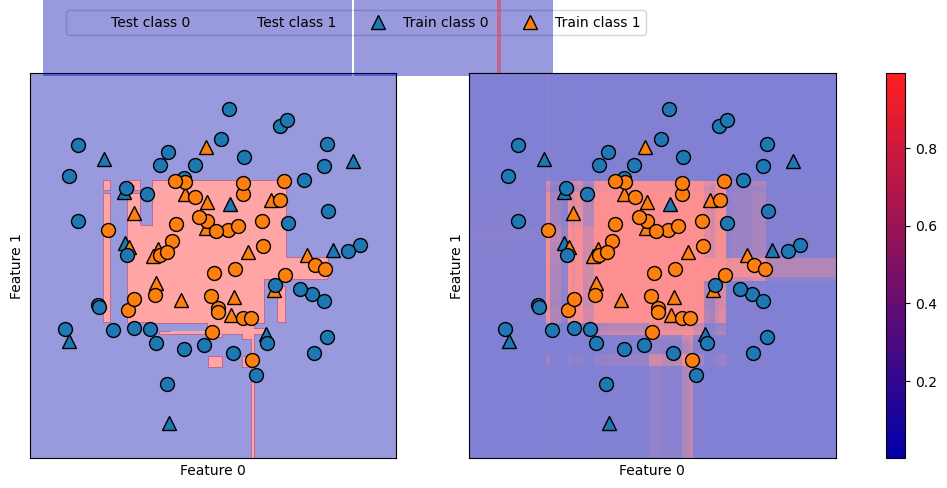

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
# don't want a transparent colorbar
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))

## Uncertainty in Multiclass Classification ##

So far, we’ve only talked about uncertainty estimates in binary classification. But the
decision_function and predict_proba methods also work in the multiclass setting.
Let’s apply them on the Iris dataset, which is a three-class classification dataset:

In [90]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [91]:
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))
# plot the first few entries of the decision function
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6, :]))

Decision function shape: (38, 3)
Decision function:
[[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]


In the multiclass case, the decision_function has the shape (n_samples,
n_classes) and each column provides a “certainty score” for each class, where a large
score means that a class is more likely and a small score means the class is less likely.
You can recover the predictions from these scores by finding the maximum entry for
each data point:

In [92]:
print("Argmax of decision function:\n{}".format(
 np.argmax(gbrt.decision_function(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


The output of predict_proba has the same shape, (n_samples, n_classes). Again,
the probabilities for the possible classes for each data point sum to 1:

In [93]:
# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test)[:6]))
# show that sums across rows are one
print("Sums: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

Predicted probabilities:
[[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
Sums: [1. 1. 1. 1. 1. 1.]


We can again recover the predictions by computing the argmax of predict_proba:

In [94]:
print("Argmax of predicted probabilities:\n{}".format(
 np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


To summarize, predict_proba and decision_function always have shape (n_sam
ples, n_classes)—apart from decision_function in the special binary case. In the
binary case, decision_function only has one column, corresponding to the “posi‐
tive” class classes_[1]. This is mostly for historical reasons.
You can recover the prediction when there are n_classes many columns by comput‐
ing the argmax across columns. Be careful, though, if your classes are strings, or you
use integers but they are not consecutive and starting from 0. If you want to compare
results obtained with predict to results obtained via decision_function or pre
dict_proba, make sure to use the classes_ attribute of the classifier to get the actual
class names:

In [97]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# represent each target by its class name in the iris dataset
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("unique classes in training data:", logreg.classes_)
print("predictions:", logreg.predict(X_test)[:10])
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("argmax of decision function:", argmax_dec_func[:10])
print("argmax combined with classes_:",
      logreg.classes_[argmax_dec_func][:10])

unique classes in training data: ['setosa' 'versicolor' 'virginica']
predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
argmax of decision function: [1 0 2 1 1 0 1 2 1 1]
argmax combined with classes_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


/Users/uli/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Unsupervised Learning and Preprocessing ##

### Types of unsupervised learning ###
### Challenges in unsupervised learning ###
### Preprocessing and Scaling ###

The first plot in Figure 3-1 shows a synthetic two-class classification dataset with two
features. The first feature (the x-axis value) is between 10 and 15. The second feature
(the y-axis value) is between around 1 and 9.

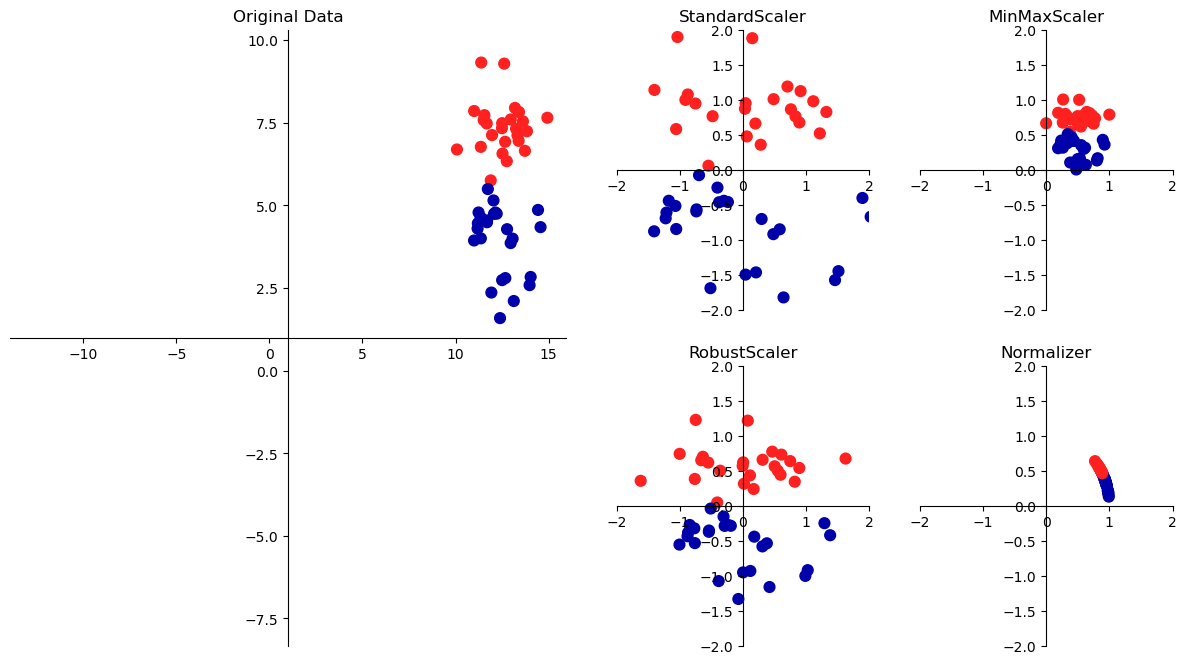

In [98]:
mglearn.plots.plot_scaling()

### Different Kinds of Preprocessing ###

The following four plots show four different ways to transform the data that yield
more standard ranges. The **StandardScaler** in scikit-learn ensures that for each
feature the mean is 0 and the variance is 1, bringing all features to the same magni‐
tude. However, this scaling does not ensure any particular minimum and maximum
values for the features. The RobustScaler works similarly to the StandardScaler in
that it ensures statistical properties for each feature that guarantee that they are on the
same scale. 

However, the **RobustScaler** uses the median and quartiles,1 instead of mean and variance. This makes the RobustScaler ignore data points that are very
different from the rest (like measurement errors). These odd data points are also
called outliers, and can lead to trouble for other scaling techniques.
The MinMaxScaler, on the other hand, shifts the data such that all features are exactly
between 0 and 1. For the two-dimensional dataset this means all of the data is contained within the rectangle created by the x-axis between 0 and 1 and the y-axis
between 0 and 1.

Finally, the **Normalizer** does a very different kind of rescaling. It scales each data
point such that the feature vector has a Euclidean length of 1. In other words, it
projects a data point on the circle (or sphere, in the case of higher dimensions) with a
radius of 1. This means every data point is scaled by a different number (by the
inverse of its length). This normalization is often used when only the direction (or
angle) of the data matters, not the length of the feature vector.

#### Applying Data Transformations

In [113]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 1)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', X_train.shape)
print('y_test shape:', X_test.shape)

X_train shape: (426, 30)
X_test shape: (143, 30)
y_train shape: (426, 30)
y_test shape: (143, 30)


In [107]:
cancer.data.shape

(569, 30)

In [108]:
cancer.target.shape

(569,)

In [112]:
X_train, y_train, X_test,  y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(426,)
(143, 30)
(143,)


In [117]:
# As with the supervised models we built earlier, we first import the class that implements the preprocessing, and then instantiate it:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


We then fit the scaler using the fit method, applied to the training data. For the Min
MaxScaler, the fit method computes the minimum and maximum value of each fea‐
ture on the training set. In contrast to the classifiers and regressors of Chapter 2, the
scaler is only provided with the data (X_train) when fit is called, and y_train is not
used:

In [118]:
scaler.fit(X_train)

MinMaxScaler()

To apply the transformation that we just learned—that is, **to actually scale the training
data—we use the transform method of the scaler**. The transform method is used in
scikit-learn whenever a model returns a new representation of the data:

In [119]:
# transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


The transformed data has the same shape as the original data—the features are simply
shifted and scaled. You can see that all of the features are now between 0 and 1, as
desired.
To apply the SVM to the scaled data, we also need to transform the test set. This is
again done by calling the transform method, this time on X_test:

In [120]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


Maybe somewhat surprisingly, you can see that for the test set, **after scaling, the mini‐
mum and maximum are not 0 and 1. Some of the features are even outside the 0–1
range! The explanation is that the MinMaxScaler (and all the other scalers) always
applies exactly the same transformation to the training and the test set. This means
the transform method always subtracts the training set minimum and divides by the
training set range, which might be different from the minimum and range for the test
set.**

## Representing Data and Engineering Features

In [5]:
import pandas as pd
import mglearn
import os
# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly in "names"
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(
    adult_path, header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# For illustration purposes, we only select some of the columns
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
# IPython.display allows nice output formatting within the Jupyter notebook
display(data.head())

age          workclass   education   gender  hours-per-week  \
0   39          State-gov   Bachelors     Male              40   
1   50   Self-emp-not-inc   Bachelors     Male              13   
2   38            Private     HS-grad     Male              40   
3   53            Private        11th     Male              40   
4   28            Private   Bachelors   Female              40   

           occupation  income  
0        Adm-clerical   <=50K  
1     Exec-managerial   <=50K  
2   Handlers-cleaners   <=50K  
3   Handlers-cleaners   <=50K  
4      Prof-specialty   <=50K

In [7]:
print(data.gender.value_counts())

gender
 Male      21790
 Female    10771
Name: count, dtype: int64


In [8]:
print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

Be careful: **column indexing in pandas includes the end of the
range, so 'age':'occupation_ Transport-moving' is inclusive of
occupation_ Transport-moving. This is different from slicing a
NumPy array, where the end of a range is not included: for exam‐
ple, np.arange(11)[0:10] doesn’t include the entry with index 10.**

In [9]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Extract NumPy arrays
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44)  y.shape: (32561,)


In [13]:
type(features)

pandas.core.frame.DataFrame

In [ ]:
list(features.columns)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Test score:{:.2f}".format(logreg.score(X_test,y_test)))

Test score:0.81


/Users/uli/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


called get_dummies on a DataFrame containing
both the training and the test data. This is important to ensure cat‐
egorical values are represented in the same way in the training set
and the test set. If we built a machine learning model on this data it would work
very badly, because it would assume the columns mean the same
things (because they are in the same position) when in fact they
mean very different things. **To fix this, either call get_dummies on a
DataFrame that contains both the training and the test data points,
or make sure that the column names are the same for the training
and test sets after calling get_dummies, to ensure they have the
same semantics.**

#### Numbers Can Encode Categoricals

In [18]:
# create a DataFrame with an integer feature and a categorical string feature
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
                        'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

Integer Feature Categorical Feature
0                0               socks
1                1                 fox
2                2               socks
3                1                 box

In [21]:
display(pd.get_dummies(demo_df))

Integer Feature  Categorical Feature_box  Categorical Feature_fox  \
0                0                    False                    False   
1                1                    False                     True   
2                2                    False                    False   
3                1                     True                    False   

   Categorical Feature_socks  
0                       True  
1                      False  
2                       True  
3                      False

Using get_dummies will only encode the string feature and will not change the integer
feature, If you want dummy variables to be created for the “Integer Feature” column, you can
explicitly list the columns you want to encode using the columns parameter. Then,
both features will be treated as categorical 

In [23]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
display(pd.get_dummies(demo_df, columns=['Integer Feature','Categorical Feature']))

Integer Feature_0  Integer Feature_1  Integer Feature_2  \
0               True              False              False   
1              False               True              False   
2              False              False               True   
3              False               True              False   

   Categorical Feature_box  Categorical Feature_fox  Categorical Feature_socks  
0                    False                    False                       True  
1                    False                     True                      False  
2                    False                    False                       True  
3                     True                    False                      False

### OneHotEncoder and ColumnTransformer: Categorical Variables with scikit-learn

In [38]:
from sklearn.preprocessing import OneHotEncoder
# Setting sparse=False means OneHotEncode will return a numpy array, not a sparse matrix
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0.]]


/Users/uli/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [39]:
print(ohe.get_feature_names())

AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names'

In [40]:
display(data.head())

age          workclass   education   gender  hours-per-week  \
0   39          State-gov   Bachelors     Male              40   
1   50   Self-emp-not-inc   Bachelors     Male              13   
2   38            Private     HS-grad     Male              40   
3   53            Private        11th     Male              40   
4   28            Private   Bachelors   Female              40   

           occupation  income  
0        Adm-clerical   <=50K  
1     Exec-managerial   <=50K  
2   Handlers-cleaners   <=50K  
3   Handlers-cleaners   <=50K  
4      Prof-specialty   <=50K

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['age', 'hours-per-week']),
     ("onehot", OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])])

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# get all columns apart from income for the features
data_features = data.drop("income", axis=1)
# split dataframe and income
X_train, X_test, y_train, y_test = train_test_split(
    data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


/Users/uli/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [43]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("Test score: {:.2f}".format(logreg.score(X_test_trans, y_test)))

Test score: 0.81


In [46]:
ct.named_transformers_.onehot

OneHotEncoder(sparse=False, sparse_output=False)

#### Convenient ColumnTransformer creation with ``make_columntransformer``

In [47]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    (['age', 'hours-per-week'], StandardScaler()),
    (['workclass', 'education', 'gender', 'occupation'], OneHotEncoder(sparse=False)))

## Binning, Discretization, Linear Models, and Trees

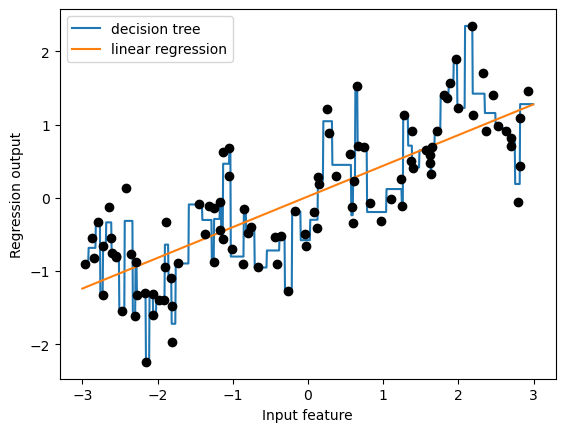

In [139]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

We imagine a partition of the input range for the feature (in this case, the numbers
from –3 to 3) into a fixed number of bins—say, 10. A data point will then be repre‐
sented by which bin it falls into. To determine this, we first have to define the bins. In
this case, we’ll define 10 bins equally spaced between –3 and 3. We use the
np.linspace function for this, creating 11 entries, which will create 10 bins—they are
the spaces in between two consecutive boundaries:

In [140]:
bins = np.linspace(-3,3,11)
print("bins:{}".format(bins))

bins:[-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


Next, we record for each data point which bin it falls into. This can be easily compu‐
ted using the np.digitize function:

In [141]:
which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])


Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


To use a scikitlearn model on this data, we transform this discrete feature to a one-hot encoding
using the OneHotEncoder from the preprocessing module. The OneHotEncoder does
the same encoding as pandas.get_dummies, though it currently only works on cate‐
gorical variables that are integers:

In [142]:
from sklearn.preprocessing import OneHotEncoder
# transform using the OneHotEncoder
encoder = OneHotEncoder(sparse=False)
# encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)
# transform creates the one-hot encoding
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


/Users/uli/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [143]:
# Because we specified 10 bins, the transformed dataset X_binned now is made up of 10 features:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


Now we build a new linear regression model and a new decision tree model on the
one-hot-encoded data. The result is visualized in Figure 4-2, together with the bin
boundaries, shown as dotted black lines:

Text(0.5, 0, 'Input feature')

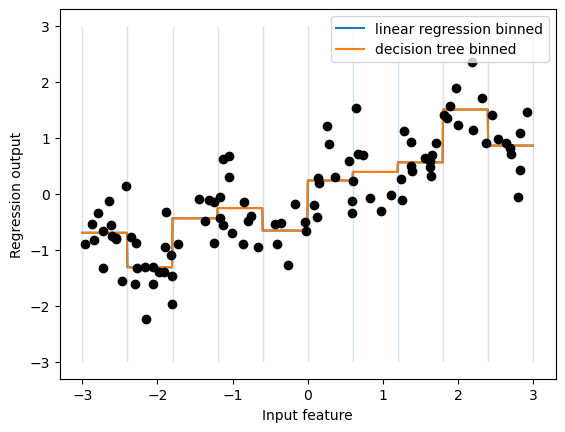

In [144]:
import matplotlib.pyplot as plt

line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

In [145]:
from sklearn.preprocessing import KBinsDiscretizer

In [146]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
        -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
         2.92132162])                                                   ]


/Users/uli/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [147]:
X_binned = kb.transform(X)
X_binned

<100x10 sparse matrix of type '<class 'numpy.float64'>'
	with 100 stored elements in Compressed Sparse Row format>

In [148]:
print(X[:10])
X_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [149]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

/Users/uli/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Text(0.5, 0, 'Input feature')

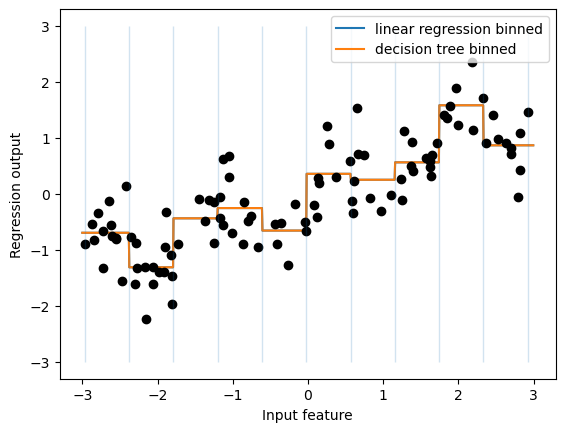

In [150]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

### Interactions and Polynomials

In [151]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


In [152]:
print(X_combined)

[[-0.75275929  0.          0.         ...  0.          0.
   0.        ]
 [ 2.70428584  0.          0.         ...  0.          0.
   1.        ]
 [ 1.39196365  0.          0.         ...  1.          0.
   0.        ]
 ...
 [-0.43475389  0.          0.         ...  0.          0.
   0.        ]
 [-2.84748524  1.          0.         ...  0.          0.
   0.        ]
 [-2.35265144  0.          1.         ...  0.          0.
   0.        ]]


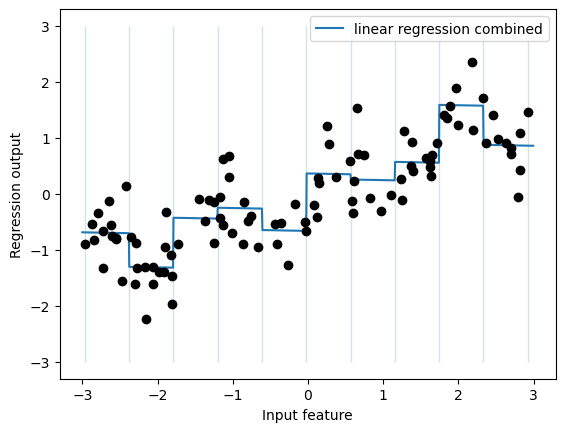

In [153]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')

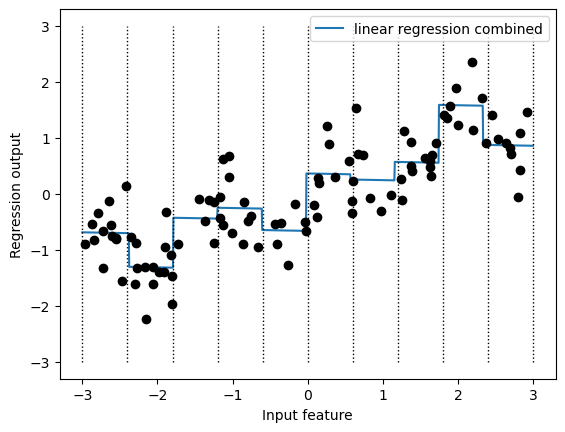

In [154]:
reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)

plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')

In this example, the model learned an offset for each bin, together with a slope. The
learned slope is downward, and shared across all the bins—there is a single x-axis fea‐
ture, which has a single slope. Because the slope is shared across all bins, it doesn’t
seem to be very helpful. We would rather have a separate slope for each bin! We can
achieve this by adding an interaction or product feature that indicates which bin a
data point is in and where it lies on the x-axis. This feature is a product of the bin
indicator and the original feature. Let’s create this dataset:

In [155]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


The dataset now has 20 features: the indicators for which bin a data point is in, and a
product of the original feature and the bin indicator. You can think of the product feature as a separate copy of the x-axis feature for each bin. It is the original feature
within the bin, and zero everywhere else. Figure 4-4 shows the result of the linear
model on this new representation:

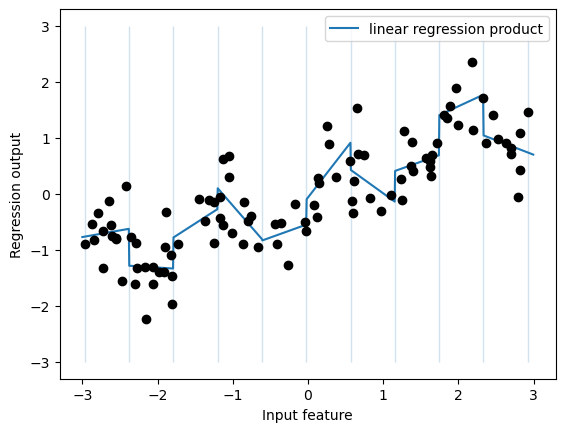

In [156]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [157]:
from sklearn.preprocessing import PolynomialFeatures

# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [158]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (100, 10)


In [159]:
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


You can obtain the semantics of the features by calling the get_feature_names
method, which provides the exponent for each feature:

In [219]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names_out()))

Polynomial feature names:
['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12'
 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3' 'x0 x4' 'x0 x5' 'x0 x6' 'x0 x7' 'x0 x8'
 'x0 x9' 'x0 x10' 'x0 x11' 'x0 x12' 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4' 'x1 x5'
 'x1 x6' 'x1 x7' 'x1 x8' 'x1 x9' 'x1 x10' 'x1 x11' 'x1 x12' 'x2^2' 'x2 x3'
 'x2 x4' 'x2 x5' 'x2 x6' 'x2 x7' 'x2 x8' 'x2 x9' 'x2 x10' 'x2 x11'
 'x2 x12' 'x3^2' 'x3 x4' 'x3 x5' 'x3 x6' 'x3 x7' 'x3 x8' 'x3 x9' 'x3 x10'
 'x3 x11' 'x3 x12' 'x4^2' 'x4 x5' 'x4 x6' 'x4 x7' 'x4 x8' 'x4 x9' 'x4 x10'
 'x4 x11' 'x4 x12' 'x5^2' 'x5 x6' 'x5 x7' 'x5 x8' 'x5 x9' 'x5 x10'
 'x5 x11' 'x5 x12' 'x6^2' 'x6 x7' 'x6 x8' 'x6 x9' 'x6 x10' 'x6 x11'
 'x6 x12' 'x7^2' 'x7 x8' 'x7 x9' 'x7 x10' 'x7 x11' 'x7 x12' 'x8^2' 'x8 x9'
 'x8 x10' 'x8 x11' 'x8 x12' 'x9^2' 'x9 x10' 'x9 x11' 'x9 x12' 'x10^2'
 'x10 x11' 'x10 x12' 'x11^2' 'x11 x12' 'x12^2']


Using polynomial features together with a linear regression model yields the classical
model of polynomial regression

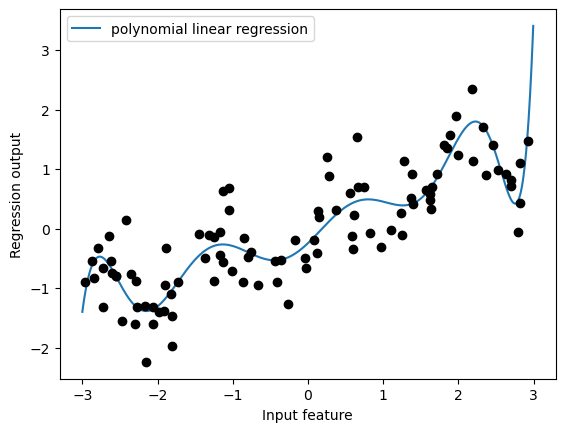

In [161]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

As a comparison, here is a kernel SVM model learned on the original data, without
any transformation

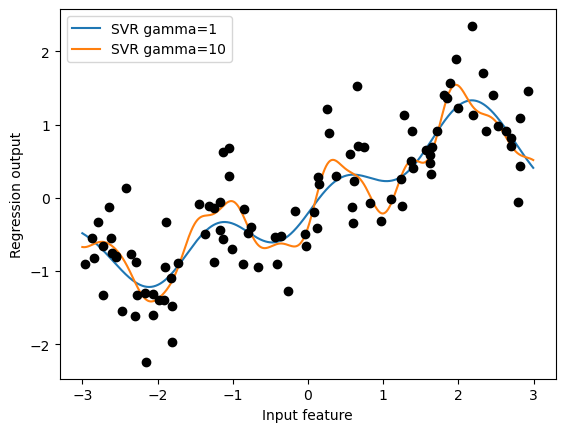

In [162]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [163]:
#from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#boston = load_boston()
#X_train, X_test, y_train, y_test = train_test_split(
#    boston.data, boston.target, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(
    data, target, random_state=0)


# rescale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [165]:
#Now, we extract polynomial features and interactions up to a degree of 2:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


The data originally had 13 features, which were expanded into 105 interaction fea‐
tures. These new features represent all possible interactions between two different
original features, as well as the square of each original feature. degree=2 here means
that we look at all features that are the product of up to two original features. The
exact correspondence between input and output features can be found using the
get_feature_names method:

In [220]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names_out()))

Polynomial feature names:
['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12'
 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3' 'x0 x4' 'x0 x5' 'x0 x6' 'x0 x7' 'x0 x8'
 'x0 x9' 'x0 x10' 'x0 x11' 'x0 x12' 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4' 'x1 x5'
 'x1 x6' 'x1 x7' 'x1 x8' 'x1 x9' 'x1 x10' 'x1 x11' 'x1 x12' 'x2^2' 'x2 x3'
 'x2 x4' 'x2 x5' 'x2 x6' 'x2 x7' 'x2 x8' 'x2 x9' 'x2 x10' 'x2 x11'
 'x2 x12' 'x3^2' 'x3 x4' 'x3 x5' 'x3 x6' 'x3 x7' 'x3 x8' 'x3 x9' 'x3 x10'
 'x3 x11' 'x3 x12' 'x4^2' 'x4 x5' 'x4 x6' 'x4 x7' 'x4 x8' 'x4 x9' 'x4 x10'
 'x4 x11' 'x4 x12' 'x5^2' 'x5 x6' 'x5 x7' 'x5 x8' 'x5 x9' 'x5 x10'
 'x5 x11' 'x5 x12' 'x6^2' 'x6 x7' 'x6 x8' 'x6 x9' 'x6 x10' 'x6 x11'
 'x6 x12' 'x7^2' 'x7 x8' 'x7 x9' 'x7 x10' 'x7 x11' 'x7 x12' 'x8^2' 'x8 x9'
 'x8 x10' 'x8 x11' 'x8 x12' 'x9^2' 'x9 x10' 'x9 x11' 'x9 x12' 'x10^2'
 'x10 x11' 'x10 x12' 'x11^2' 'x11 x12' 'x12^2']


Let’s compare the performance using Ridge on the data with and without interac‐
tions:

In [167]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
    ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(
    ridge.score(X_test_poly, y_test)))

Score without interactions: 0.621
Score with interactions: 0.753


Clearly, the interactions and polynomial features gave us a good boost in perfor‐
mance when using Ridge. When using a more complex model like a random forest,
the story is a bit different, though:

In [168]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
    rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score without interactions: 0.799
Score with interactions: 0.760


You can see that even without additional features, the random forest beats the
performance of Ridge. Adding interactions and polynomials actually decreases per‐
formance slightly.

### Univariate Nonlinear Transformations

In [169]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [170]:
print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


The value 2 seems to be the most common, with 68 appearances (bincount always
starts at 0), and the counts for higher values fall quickly. However, there are some
very high values, like 84 and 85, that are appearing twice. We visualize the counts in:

Text(0.5, 0, 'Value')

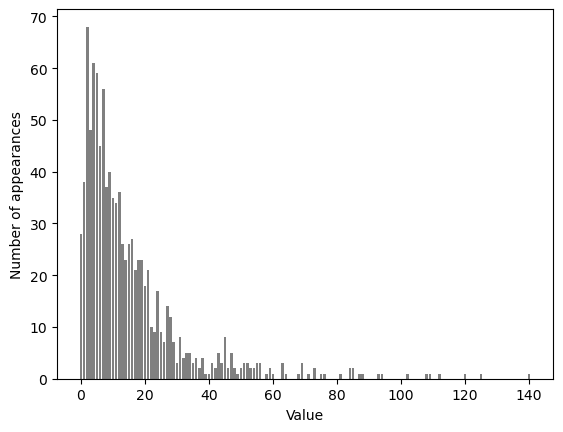

In [171]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

Features X[:, 1] and X[:, 2] have similar properties. This kind of distribution of
values (many small ones and a few very large ones) is very common in practice.1
However, it is something most linear models can’t handle very well. Let’s try to fit a
ridge regression to this model:

In [172]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


As you can see from the relatively low R
2
 score, Ridge was not able to really capture
the relationship between X and y. Applying a logarithmic transformation can help,
though. Because the value 0 appears in the data (and the logarithm is not defined at
0), we can’t actually just apply log, but we have to compute log(X + 1):

In [173]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'Value')

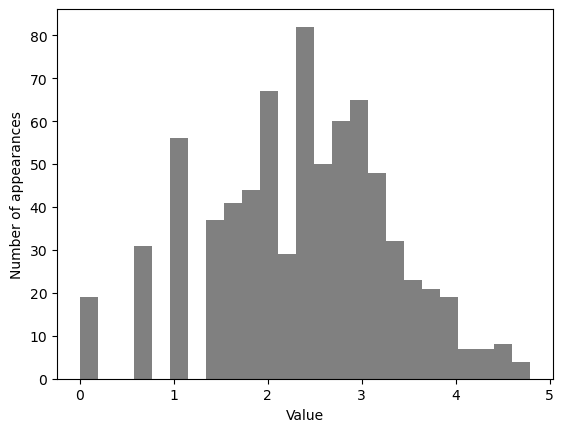

In [174]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

Building a ridge model on the new data provides a much better fit:

In [175]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


Finding the transformation that works best for each combination of dataset and
model is somewhat of an art. In this example, all the features had the same properties.
This is rarely the case in practice, and usually only a subset of the features should be
transformed, or sometimes each feature needs to be transformed in a different way.
As we mentioned earlier, these kinds of transformations are irrelevant for tree-based
models but might be essential for linear models. Sometimes it is also a good idea to
transform the target variable y in regression. Trying to predict counts (say, number of
orders) is a fairly common task, and using the log(y + 1) transformation often
helps.

### Automatic Feature Selection
#### Univariate statistics

In [177]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([], [])

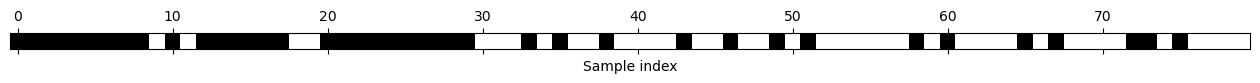

In [178]:
mask = select.get_support()
print(mask)
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

As you can see from the visualization of the mask, most of the selected features are
the original features, and most of the noise features were removed. However, the
recovery of the original features is not perfect. Let’s compare the performance of
logistic regression on all features against the performance using only the selected
features:

In [179]:
from sklearn.linear_model import LogisticRegression

# transform test data
X_test_selected = select.transform(X_test)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(
    lr.score(X_test_selected, y_test)))

Score with all features: 0.940
Score with only selected features: 0.937


/Users/uli/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/uli/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

#### Model-based Feature Selection

In [187]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

In [188]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


([], [])

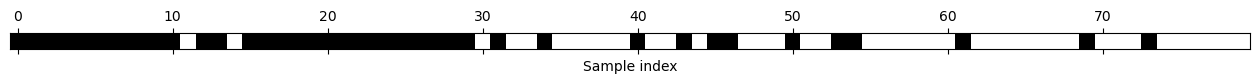

In [189]:
mask = select.get_support()
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

This time, all but two of the original features were selected. Because we specified to
select 40 features, some of the noise features are also selected. Let’s take a look at the
performance:

In [183]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=1000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


/Users/uli/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Iterative feature selection

([], [])

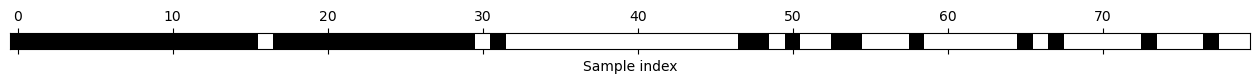

In [191]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [185]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression(max_iter=1000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.954


/Users/uli/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The feature selection got better compared to the univariate and model-based selec‐
tion, but one feature was still missed. Running this code also takes significantly longer
than that for the model-based selection, because a random forest model is trained 40
times, once for each feature that is dropped. Let’s test the accuracy of the logistic
regression model when using RFE for feature selection:

We can also use the model used inside the RFE to make predictions. This uses only
the feature set that was selected:

In [195]:
print("Test score: {:.3f}".format(select.score(X_test, y_test)))

Test score: 0.951


Here, the performance of the random forest used inside the RFE is the same as that
achieved by training a logistic regression model on top of the selected features. In
other words, once we’ve selected the right features, the linear model performs as well
as the random forest.
If you are unsure when selecting what to use as input to your machine learning algo‐
rithms, automatic feature selection can be quite helpful. It is also great for reducing
the amount of features needed—for example, to speed up prediction or to allow for
more interpretable models. In most real-world cases, applying feature selection is
unlikely to provide large gains in performance. However, it is still a valuable tool in
the toolbox of the feature engineer.

Be carefull to fit the model should be using the transform dataset

In [194]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression(max_iter=1000).fit(X_train, y_train).score(X_test_rfe, y_test)
print("Test Score: {:.3f}".format(score))

/Users/uli/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: X has 40 features, but LogisticRegression is expecting 80 features as input.

#### Iterative feature selection

In [196]:
citibike = mglearn.datasets.load_citibike()

In [198]:
print("Citi Bike data:\n{}".format(citibike.head()))

Citi Bike data:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, 'Rentals')

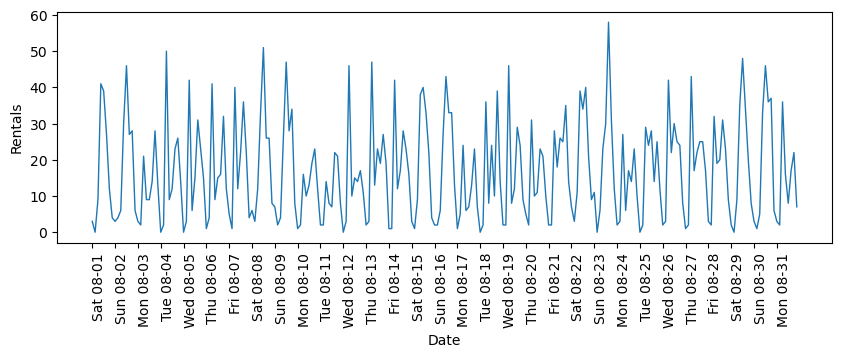

In [199]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
                       freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

Looking at the data, we can clearly distinguish day and night for each 24-hour inter‐
val. The patterns for weekdays and weekends also seem to be quite different. When
evaluating a prediction task on a time series like this, we usually want to learn from
the past and predict for the future. This means when doing a split into a training and a
test set, we want to use all the data up to a certain date as the training set and all the
data past that date as the test set. This is how we would usually use time series predic‐
tion: given everything that we know about rentals in the past, what do we think will happen tomorrow? We will use the first 184 data points, corresponding to the first 23
days, as our training set, and the remaining 64 data points, corresponding to the
remaining 8 days, as our test set.
The only feature that we are using in our prediction task is the date and time when a
particular number of rentals occurred. So, the input feature is the date and time—say,
2015-08-01 00:00:00—and the output is the number of rentals in the following
three hours (three in this case, according to our DataFrame).
A (surprisingly) common way that dates are stored on computers is using POSIX
time, which is the number of seconds since January 1970 00:00:00 (aka the beginning
of Unix time). As a first try, we can use this single integer feature as our data repre‐
sentation:

In [200]:
# extract the target values (number of rentals)
y = citibike.values
# convert to POSIX time by dividing by 10**9
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

In [201]:
# use the first 184 data points for training, the rest for testing
n_train = 184

# function to evaluate and plot a regressor on a given feature set
def eval_on_features(features, target, regressor):
    # split the given features into a training and a test set
    X_train, X_test = features[:n_train], features[n_train:]
    # also split the target array
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))

    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90,
               ha="left")

    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
             label="prediction test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

We saw earlier that random forests require very little preprocessing of the data, which
makes this seem like a good model to start with. We use the POSIX time feature X and
pass a random forest regressor to our eval_on_features function. Figure 4-13 shows
the result:

Test-set R^2: -0.04


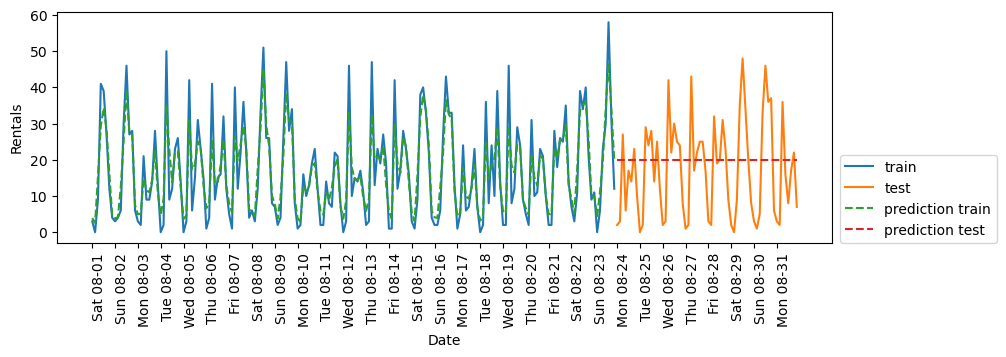

In [202]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

The predictions on the training set are quite good, as is usual for random forests.
However, for the test set, a constant line is predicted. The R
2
is –0.04, which means
that we learned nothing. What happened?
The problem lies in the combination of our feature and the random forest. The value
of the POSIX time feature for the test set is outside of the range of the feature values
in the training set: the points in the test set have timestamps that are later than all the
points in the training set. Trees, and therefore random forests, cannot extrapolate to
feature ranges outside the training set. The result is that the model simply predicts the
target value of the closest point in the training set—which is the last time it observed
any data.
Clearly we can do better than this. This is where our “expert knowledge” comes in.
From looking at the rental figures in the training data, two factors seem to be very
important: the time of day and the day of the week. So, let’s add these two features.
We can’t really learn anything from the POSIX time, so we drop that feature. First,
let’s use only the hour of the day. As Figure 4-14 shows, now the predictions have the
same pattern for each day of the week:

Test-set R^2: 0.60


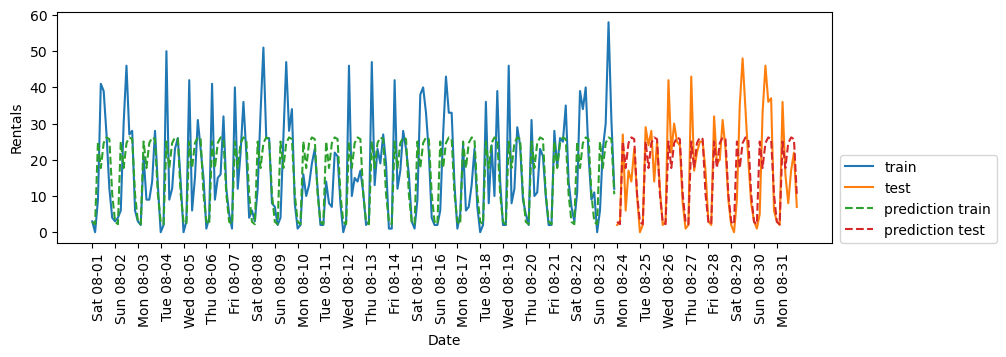

In [203]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

The R2
 is already much better, but the predictions clearly miss the weekly pattern.
Now let’s also add the day of the week 

Test-set R^2: 0.84


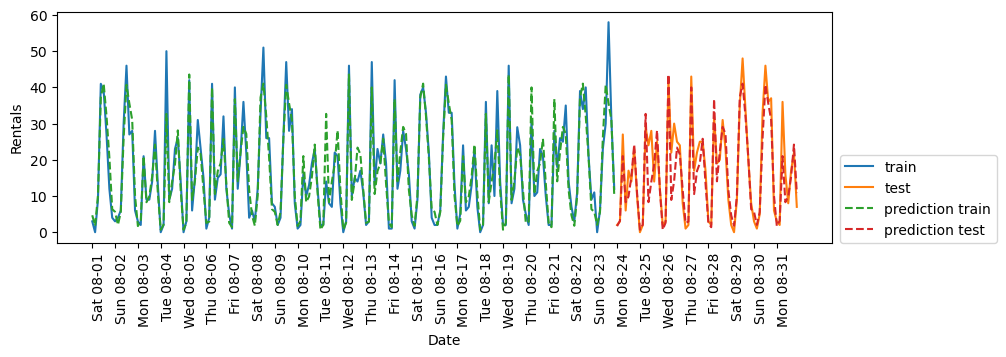

In [204]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

Now we have a model that captures the periodic behavior by considering the day of
week and time of day. It has an R
2
 of 0.84, and shows pretty good predictive perfor‐
mance. What this model likely is learning is the mean number of rentals for each
combination of weekday and time of day from the first 23 days of August. This
actually does not require a complex model like a random forest, so let’s try with a
simpler model, LinearRegression

Test-set R^2: 0.13


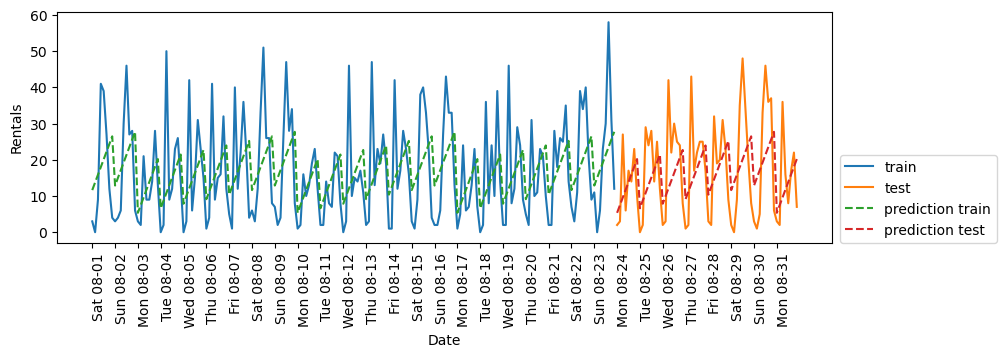

In [206]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

LinearRegression works much worse, and the periodic pattern looks odd. The rea‐
son for this is that we encoded day of week and time of day using integers, which are
interpreted as continuous variables. Therefore, the linear model can only learn a lin‐
ear function of the time of day—and it learned that later in the day, there are more
rentals. However, the patterns are much more complex than that. We can capture this
by interpreting the integers as categorical variables, by transforming them using One
HotEncoder

In [207]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

Test-set R^2: 0.62


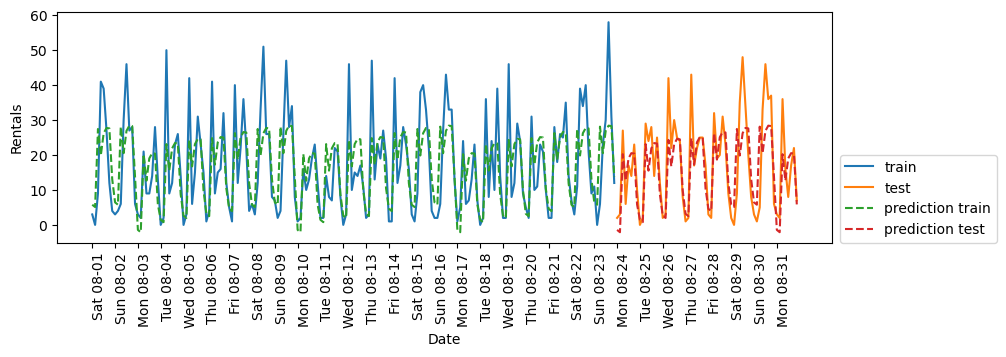

In [208]:
eval_on_features(X_hour_week_onehot, y, Ridge())

This gives us a much better match than the continuous feature encoding. Now the
linear model learns one coefficient for each day of the week, and one coefficient for
each time of the day. That means that the “time of day” pattern is shared over all days
of the week, though.
Using interaction features, we can allow the model to learn one coefficient for each
combination of day and time of day

Test-set R^2: 0.85


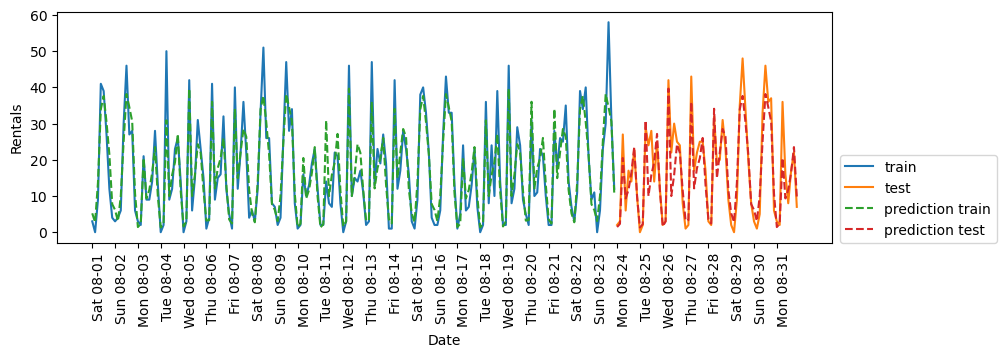

In [214]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

This transformation finally yields a model that performs similarly well to the random
forest. A big benefit of this model is that it is very clear what is learned: one coeffi‐
cient for each day and time. We can simply plot the coefficients learned by the model,
something that would not be possible for the random forest.
First, we create feature names for the hour and day features:

In [215]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features =  day + hour

In [217]:
# features_poly = poly_transformer.get_feature_names(features)
features_poly = poly_transformer.get_feature_names_out(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Text(0, 0.5, 'Feature magnitude')

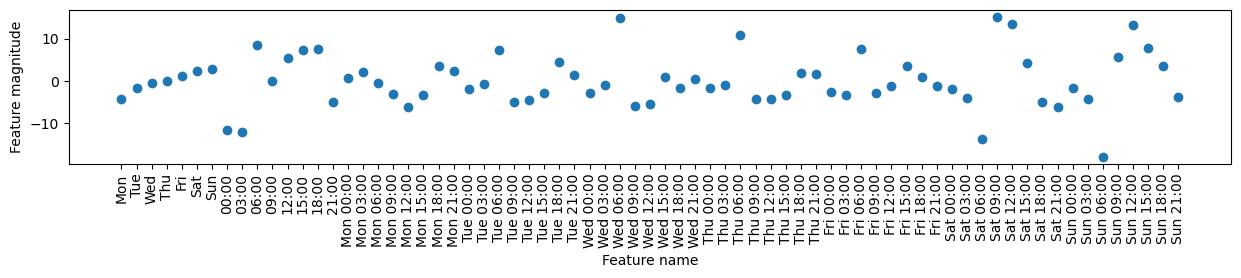

In [218]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature name")
plt.ylabel("Feature magnitude")


In this chapter, we discussed how to deal with different data types (in particular, with
categorical variables). We emphasized the importance of representing data in a way
that is suitable for the machine learning algorithm—for example, by one-hotencoding categorical variables. We also discussed the importance of engineering new
features, and the possibility of utilizing expert knowledge in creating derived features
from your data. In particular, linear models might benefit greatly from generating
new features via binning and adding polynomials and interactions, while more com‐
plex, nonlinear models like random forests and SVMs might be able to learn more
complex tasks without explicitly expanding the feature space. In practice, the features
that are used (and the match between features and method) is often the most impor‐
tant piece in making a machine learning approach work well.
Now that you have a good idea of how to represent your data in an appropriate way
and which algorithm to use for which task, the next chapter will focus on evaluating
the performance of machine learning models and selecting the right parameter
settings.

## Ridge regression and classification

In [10]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

Ridge(alpha=0.5)

In [12]:
reg.coef_

array([0.34545455, 0.34545455])

In [13]:
reg.intercept_

0.13636363636363638

## RidgeCV

In [14]:
import numpy as np
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
reg.alpha_

0.01

## Lasso

In [15]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])
reg.predict([[1, 1]])

array([0.8])

## Lasso and Elastic Net

Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...
Computing regularization path using the positive elastic net...


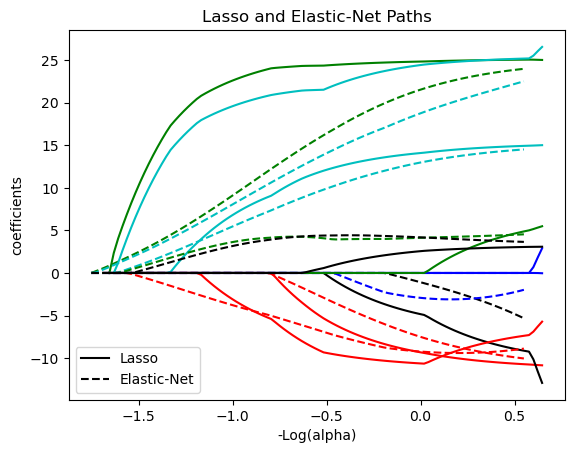

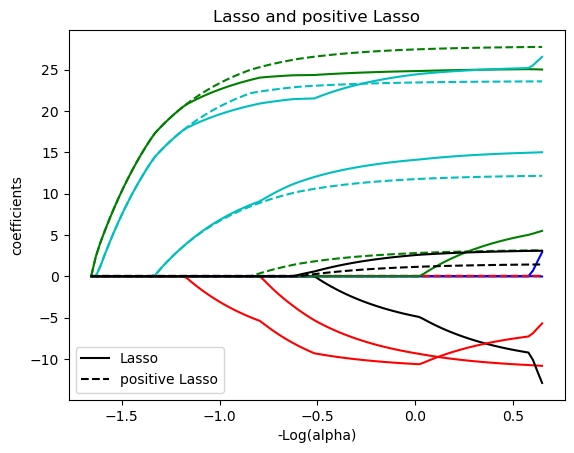

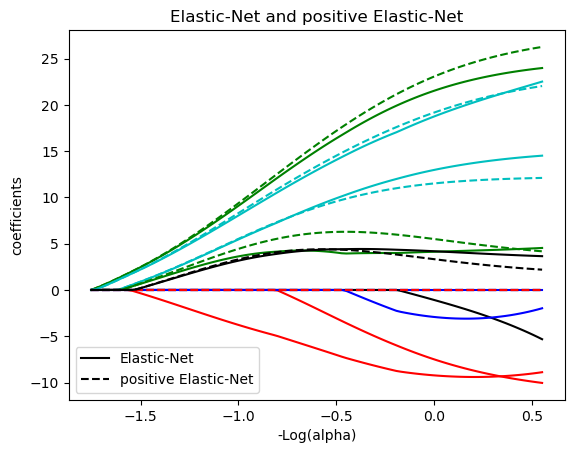

In [16]:
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

from itertools import cycle

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.linear_model import enet_path, lasso_path

X, y = datasets.load_diabetes(return_X_y=True)


X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)

# Compute paths

eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps)

print("Computing regularization path using the positive lasso...")
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
    X, y, eps=eps, positive=True
)
print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8)

print("Computing regularization path using the positive elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X, y, eps=eps, l1_ratio=0.8, positive=True
)

# Display results

plt.figure(1)
colors = cycle(["b", "r", "g", "c", "k"])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Lasso and Elastic-Net Paths")
plt.legend((l1[-1], l2[-1]), ("Lasso", "Elastic-Net"), loc="lower left")
plt.axis("tight")


plt.figure(2)
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Lasso and positive Lasso")
plt.legend((l1[-1], l2[-1]), ("Lasso", "positive Lasso"), loc="lower left")
plt.axis("tight")


plt.figure(3)
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
for coef_e, coef_pe, c in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
    l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Elastic-Net and positive Elastic-Net")
plt.legend((l1[-1], l2[-1]), ("Elastic-Net", "positive Elastic-Net"), loc="lower left")
plt.axis("tight")
plt.show()

## LARS Lasso

In [17]:
from sklearn import linear_model
reg = linear_model.LassoLars(alpha=.1)
reg.fit([[0, 0], [1, 1]], [0, 1])
reg.coef_

array([0.6, 0. ])

## Bayesian Ridge Regression

In [18]:
from sklearn import linear_model
X = [[0., 0.], [1., 1.], [2., 2.], [3., 3.]]
Y = [0., 1., 2., 3.]
reg = linear_model.BayesianRidge()
reg.fit(X, Y)

BayesianRidge()

In [19]:
reg.predict([[1, 0.]])

array([0.50000013])

In [20]:
reg.coef_

array([0.49999993, 0.49999993])